In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import AMM_sim_functions as sim

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
df_init_0 = pd.read_csv('data/ETHUSDC/daily/ETHUSDC-1m-2024-08-25.csv')
df_init_0.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']
df_init_0.set_index('time', inplace=True)
df_init_0.index = pd.to_datetime(df_init_0.index, unit='ms')
df_init_0

,open,high,low,close,s1,s2,s3,s4,s5,s6,s7
time,,,,,,,,,,,
2024-08-25 00:01:00,2768.60,2770.33,2768.00,2769.79,15.6995,1724544119999,43473.365591,64,1.5642,4331.016173,0
2024-08-25 00:02:00,2770.75,2770.90,2769.91,2770.90,2.6636,1724544179999,7379.020744,18,0.1622,449.287718,0
2024-08-25 00:03:00,2771.00,2771.92,2771.00,2771.92,7.0483,1724544239999,19535.562254,15,2.0328,5634.538224,0
2024-08-25 00:04:00,2772.50,2772.50,2769.80,2771.58,6.1543,1724544299999,17055.699803,35,1.1599,3213.148582,0
2024-08-25 00:05:00,2770.07,2778.47,2770.07,2775.21,82.4213,1724544359999,228706.176341,355,31.2555,86718.040862,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-25 23:55:00,2746.14,2746.36,2745.40,2746.34,2.4687,1724630159999,6779.020314,17,2.2902,6288.840088,0
2024-08-25 23:56:00,2747.46,2748.25,2746.81,2748.25,2.2534,1724630219999,6190.821672,15,1.1324,3111.284092,0
2024-08-25 23:57:00,2748.39,2748.54,2748.22,2748.30,2.1212,1724630279999,5829.898798,10,1.1308,3107.820004,0


In [ ]:
df_0 = df_init_0[['close']].copy()

,close
time,
2024-08-25 00:01:00,2769.79
2024-08-25 00:02:00,2770.90
2024-08-25 00:03:00,2771.92
2024-08-25 00:04:00,2771.58
2024-08-25 00:05:00,2775.21
...,...
2024-08-25 23:55:00,2746.34
2024-08-25 23:56:00,2748.25
2024-08-25 23:57:00,2748.30


In [4]:
# Market Parameters

T = 1 # Time horizon
N = np.shape(df_0['close'].values)[0]-1 # Number of periods
dt = T/N # Time increment
buy = 2500.*dt # Constant trade size for systematic buyers
sell = -2500.*dt # Constant trade size for systematic sellers
eta0 = 0.005 # CEX proportional cost
eta1 = 0.0025 # CPMM proportional cost
X = 30000000 # Initial CPMM Dollar Reserves
Y = 10000 # Initial CPMM Asset Reserves
S = X/Y # Initial CEX Price
sigma = 0.05 # Standard deviation of CEX price shock
mu = 0  # Mean of CEX price shock
M = 1 # Total number of sims
time = np.array([i * dt for i in range(N+1)]) # Time grid

In [5]:
pa_0 = np.array([df_0['close'].values])

In [7]:
%%time 

filtr_bfs , filtr_sfs =  sim.generate_trade_filters(N, M) # Generate buyer-first/seller-first trade filter

X_reserves, Y_reserves, ref_price, amm_price, buy_rev, sell_rev, arb_rev, hedge_val = \
                        sim.simulation(M, N, T, dt, buy, sell, eta0, eta1, pa_0.T, X, Y, filtr_bfs, filtr_sfs) # Market simulation

CPU times: user 172 ms, sys: 5.4 ms, total: 178 ms
Wall time: 178 ms


In [45]:
# Parallel For Loop Parameters
eta1_vals = np.array([i*0.00025 for i in range(0,101)]) # Set of possible eta values
eta1_vals

array([0.     , 0.00025, 0.0005 , 0.00075, 0.001  , 0.00125, 0.0015 ,
       0.00175, 0.002  , 0.00225, 0.0025 , 0.00275, 0.003  , 0.00325,
       0.0035 , 0.00375, 0.004  , 0.00425, 0.0045 , 0.00475, 0.005  ,
       0.00525, 0.0055 , 0.00575, 0.006  , 0.00625, 0.0065 , 0.00675,
       0.007  , 0.00725, 0.0075 , 0.00775, 0.008  , 0.00825, 0.0085 ,
       0.00875, 0.009  , 0.00925, 0.0095 , 0.00975, 0.01   , 0.01025,
       0.0105 , 0.01075, 0.011  , 0.01125, 0.0115 , 0.01175, 0.012  ,
       0.01225, 0.0125 , 0.01275, 0.013  , 0.01325, 0.0135 , 0.01375,
       0.014  , 0.01425, 0.0145 , 0.01475, 0.015  , 0.01525, 0.0155 ,
       0.01575, 0.016  , 0.01625, 0.0165 , 0.01675, 0.017  , 0.01725,
       0.0175 , 0.01775, 0.018  , 0.01825, 0.0185 , 0.01875, 0.019  ,
       0.01925, 0.0195 , 0.01975, 0.02   , 0.02025, 0.0205 , 0.02075,
       0.021  , 0.02125, 0.0215 , 0.02175, 0.022  , 0.02225, 0.0225 ,
       0.02275, 0.023  , 0.02325, 0.0235 , 0.02375, 0.024  , 0.02425,
       0.0245 , 0.02

In [46]:
df_init_1 = pd.read_csv('data/ETHUSDC/ETHUSDC-1m-2024-07-25.csv')
df_init_1.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']
df_init_1.set_index('time', inplace=True)
df_init_1.index = pd.to_datetime(df_init_1.index, unit='ms')
df_1 = df_init_1[['close']].copy()
pa_1 = np.array([df_1['close'].values])

In [47]:
df_init_2 = pd.read_csv('data/ETHUSDC/ETHUSDC-1m-2024-05-25.csv')
df_init_2.columns=['time', 'open', 'high', 'low', 'close', 's1', 's2', 's3', 's4', 's5', 's6', 's7']
df_init_2.set_index('time', inplace=True)
df_init_2.index = pd.to_datetime(df_init_2.index, unit='ms')
df_2 = df_init_2[['close']].copy()
pa_2 = np.array([df_2['close'].values])

In [48]:
pa_0 /= (pa_0[0, 0]/3000.)
pa_1 /= (pa_1[0,0]/3000.)
pa_2 /= (pa_2[0,0]/3000.)

In [49]:
plt.show()
plt.rcParams["figure.figsize"] = [16, 9]

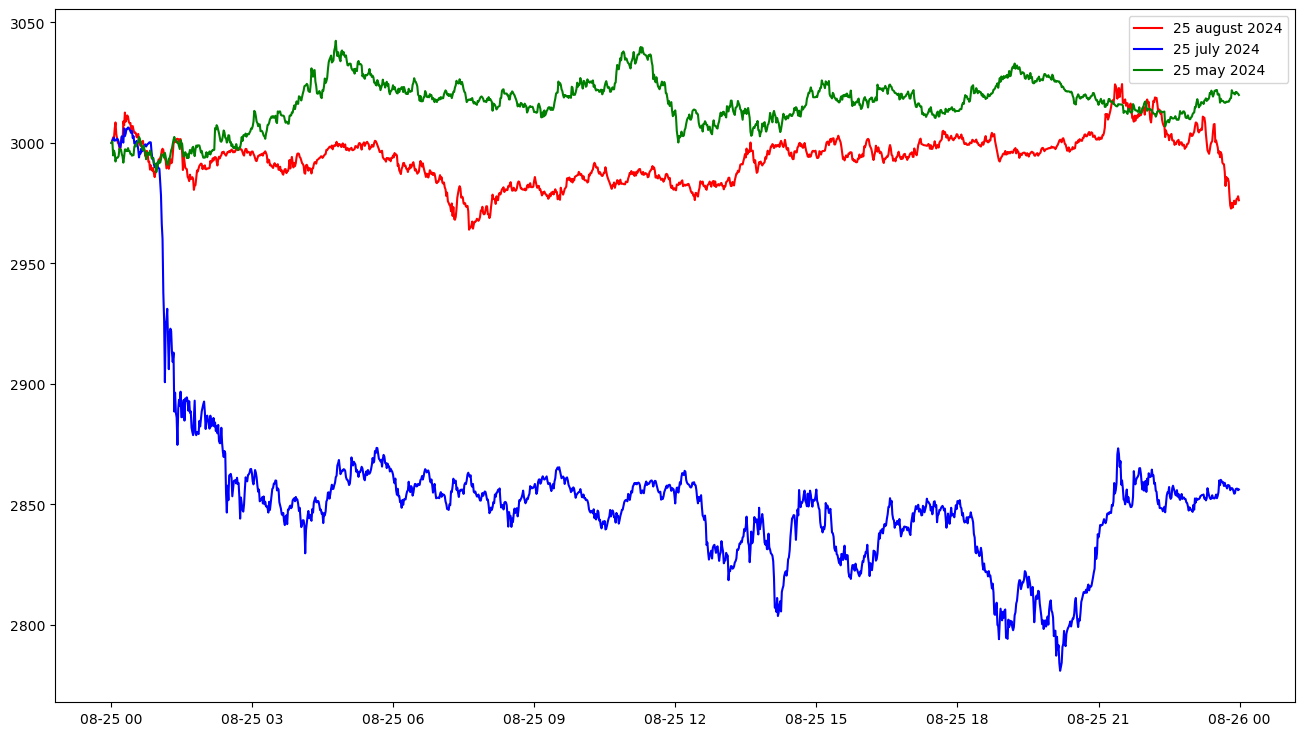

In [50]:
plt.plot(df_0.index.values, pa_0[0,:], 'r', label="25 august 2024")
plt.plot(df_0.index.values, pa_1[0,:], 'b', label="25 july 2024")
plt.plot(df_0.index.values, pa_2[0,:], 'g', label="25 may 2024")
plt.legend()
plt.show()

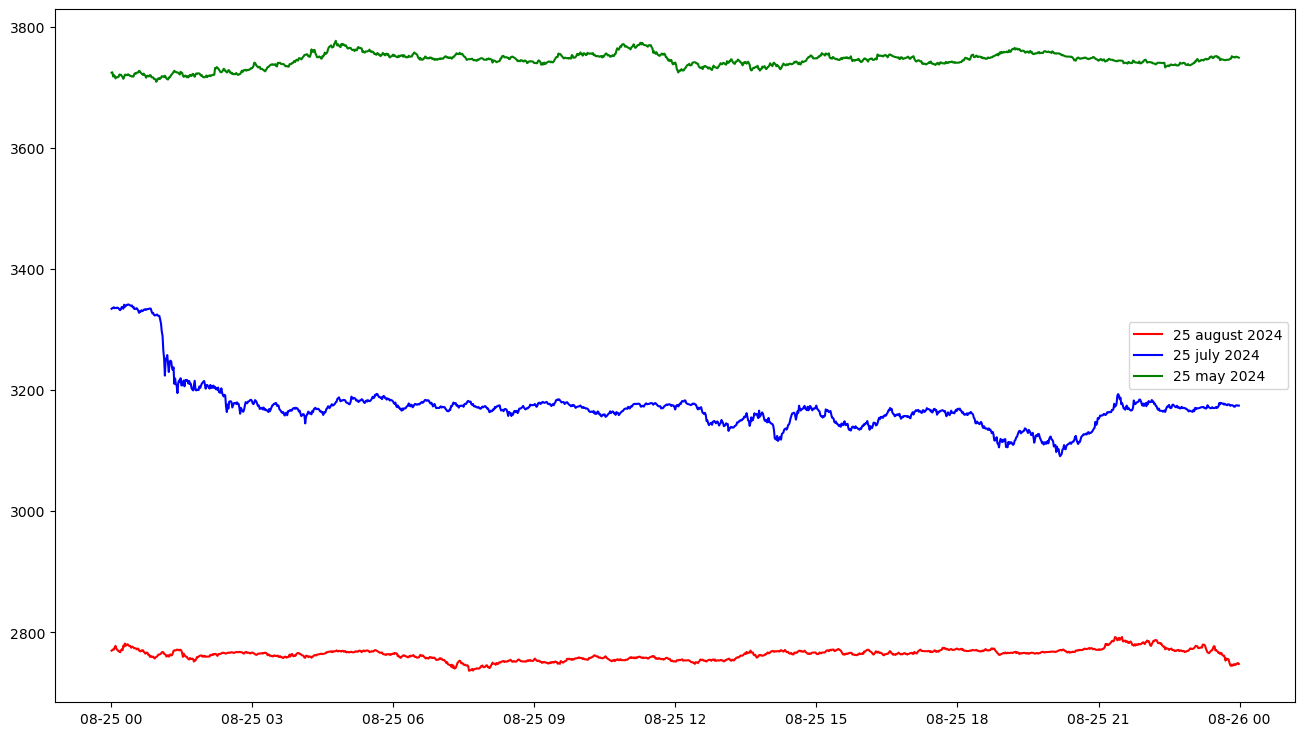

In [51]:
plt.plot(df_0.index.values, df_0['close'].values, 'r', label="25 august 2024")
plt.plot(df_0.index.values, df_1['close'].values, 'b', label="25 july 2024")
plt.plot(df_0.index.values, df_2['close'].values, 'g', label="25 may 2024")
plt.legend()
plt.show()

In [52]:
df_0['log_return'] = np.log(df_0['close'] / df_0['close'].shift(1))

intraday_variance = df_0['log_return'].var()

minutes_per_day = 1440 
trading_days_per_year = 365 

annualized_volatility = np.sqrt(intraday_variance * minutes_per_day * trading_days_per_year)

print(f"Volatilité annualisée au 25 août 2024: {annualized_volatility:.6f}")

Volatilité annualisée au 25 août 2024: 0.359710


In [53]:
df_1['log_return'] = np.log(df_1['close'] / df_1['close'].shift(1))

intraday_variance = df_1['log_return'].var()

annualized_volatility = np.sqrt(intraday_variance * minutes_per_day * trading_days_per_year)

print(f"Volatilité annualisée au 25 juillet 2024: {annualized_volatility:.6f}")

Volatilité annualisée au 25 juillet 2024: 0.817920


In [54]:
df_2['log_return'] = np.log(df_2['close'] / df_2['close'].shift(1))

intraday_variance = df_2['log_return'].var()

annualized_volatility = np.sqrt(intraday_variance * minutes_per_day * trading_days_per_year)

print(f"Volatilité annualisée au 25 mai 2024: {annualized_volatility:.6f}")

Volatilité annualisée au 25 mai 2024: 0.344955


In [55]:
%%time

output_vals1 = Parallel(n_jobs=8)(
    delayed(simulation_realprice)( N, T, dt, pa_0, buy, sell, noise, eta0, eta1_vals[j], X, Y) for j in tqdm(range(len(eta1_vals)))
)

output_vals2 = Parallel(n_jobs=8)(
    delayed(simulation_realprice)( N, T, dt, pa_1, buy, sell, noise, eta0, eta1_vals[j], X, Y) for j in tqdm(range(len(eta1_vals)))
)

output_vals3 = Parallel(n_jobs=8)(
    delayed(simulation_realprice)( N, T, dt, pa_2, buy, sell, noise, eta0, eta1_vals[j], X, Y) for j in tqdm(range(len(eta1_vals)))
)


  8%|██████▋                                                                              | 8/101 [00:00<00:01, 48.90it/s]

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


100%|███████████████████████████████████████████████████████████████████████████████████| 101/101 [00:03<00:00, 26.33it/s]


CPU times: user 1.2 s, sys: 165 ms, total: 1.36 s
Wall time: 16.4 s


In [56]:
output_vals1 = np.array(output_vals1)
output_vals2 = np.array(output_vals2)
output_vals3 = np.array(output_vals3)

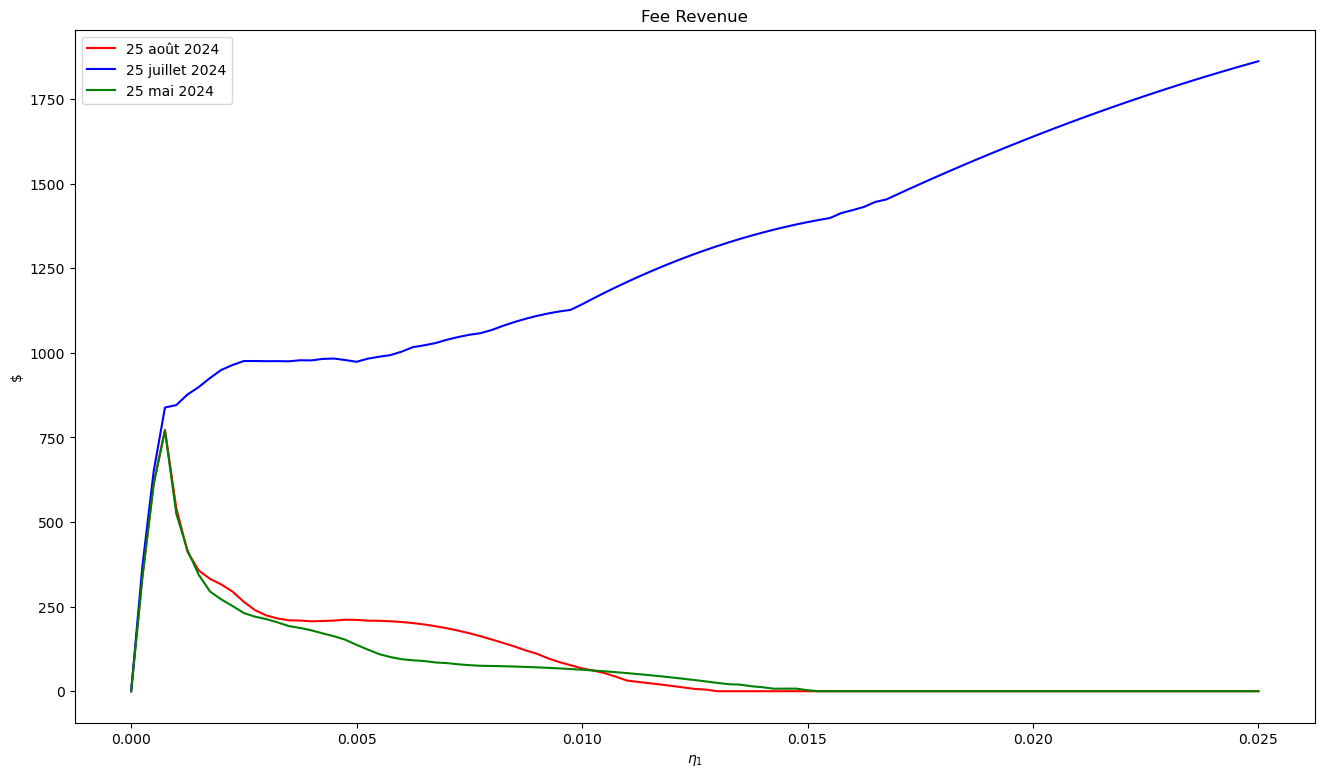

In [57]:
plt.plot(eta1_vals,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2], color='green',label="25 mai 2024")
plt.title("Fee Revenue")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('fee_rev_eta_sigma.pdf')

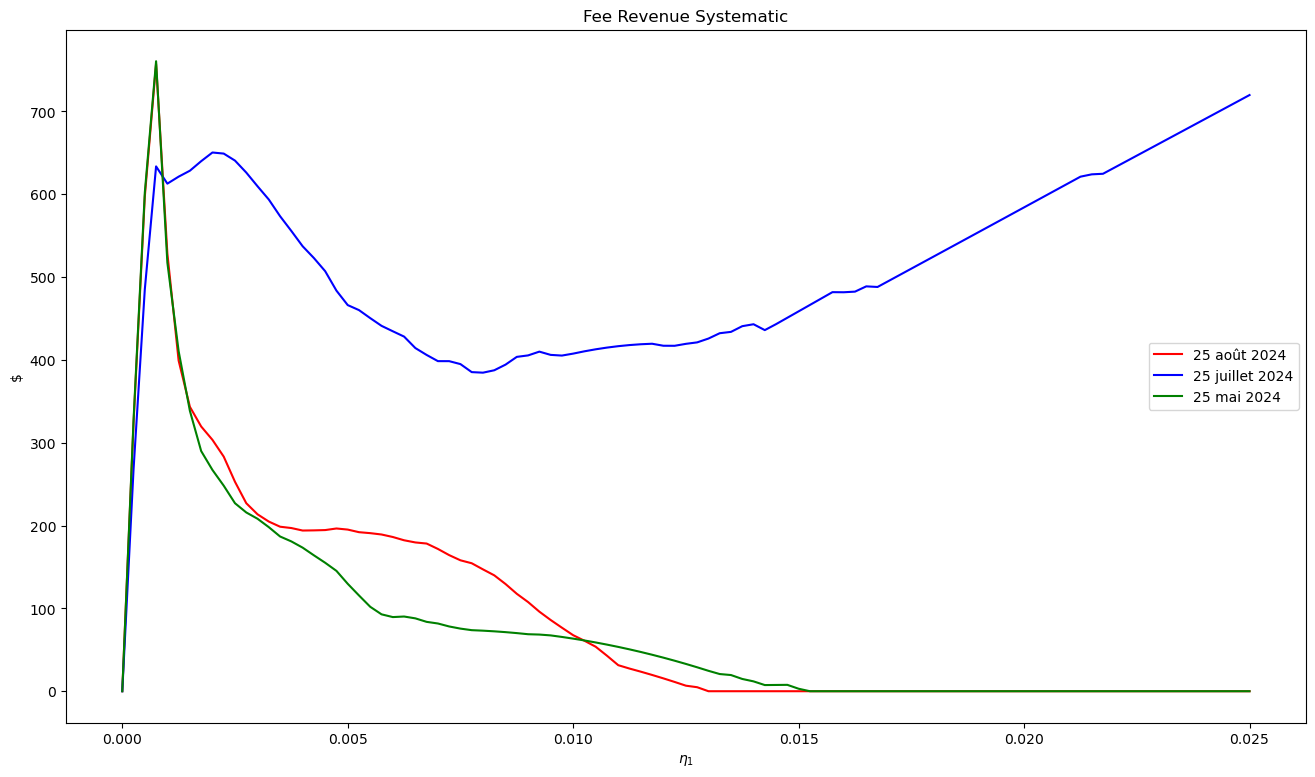

In [58]:
plt.plot(eta1_vals,output_vals1[:,0]+output_vals1[:,1], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,0]+output_vals2[:,1], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,0]+output_vals3[:,1], color='green',label="25 mai 2024")
plt.title("Fee Revenue Systematic")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
#plt.savefig('fee_rev_eta_sigma.pdf')

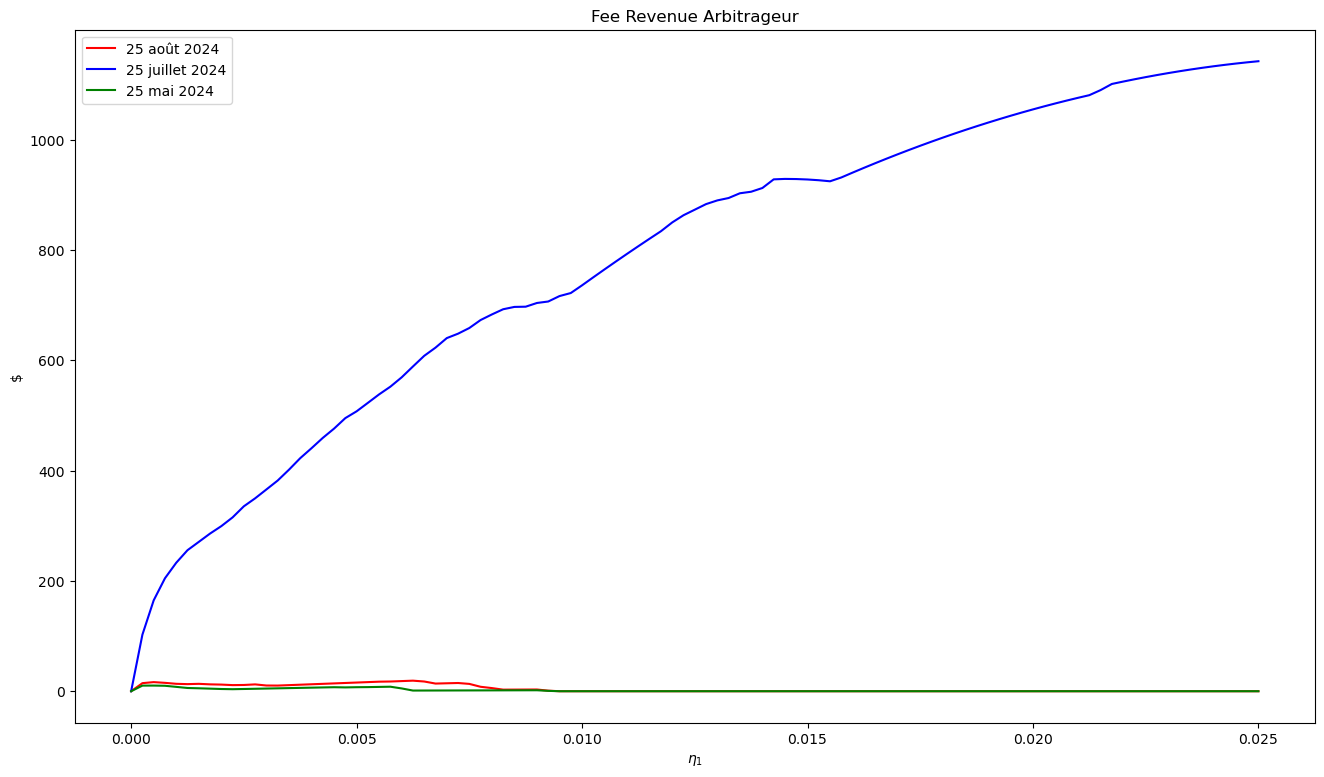

In [59]:
plt.plot(eta1_vals,output_vals1[:,2], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,2], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,2], color='green',label="25 mai 2024")
plt.title("Fee Revenue Arbitrageur")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
#plt.savefig('fee_rev_eta_sigma.pdf')

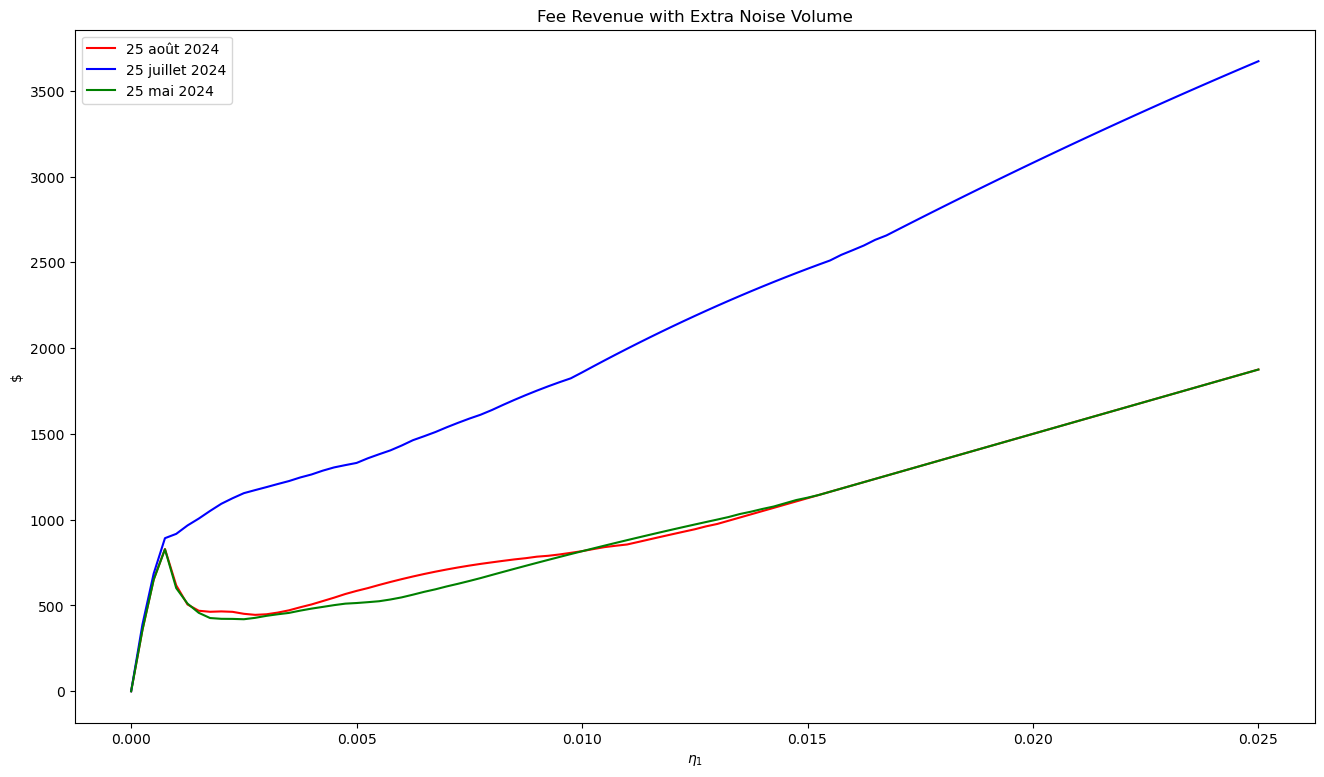

In [60]:
plt.plot(eta1_vals,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,16], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,16], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,16], color='green',label="25 mai 2024")
plt.title("Fee Revenue with Extra Noise Volume")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('fee_rev_eta_sigma_noise.pdf')

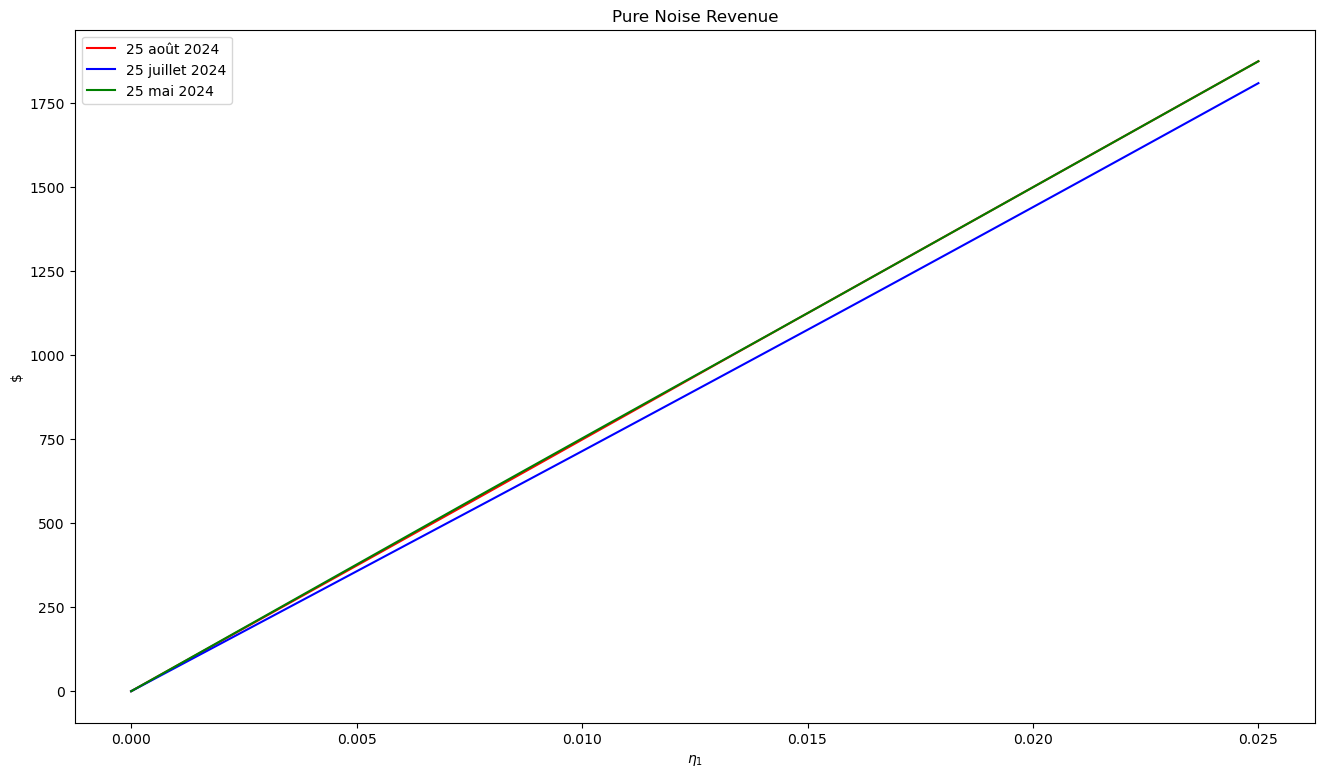

In [61]:
plt.plot(eta1_vals,output_vals1[:,16], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,16], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,16], color='green',label="25 mai 2024")
plt.title("Pure Noise Revenue")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('noise_rev_eta_sigma.pdf')

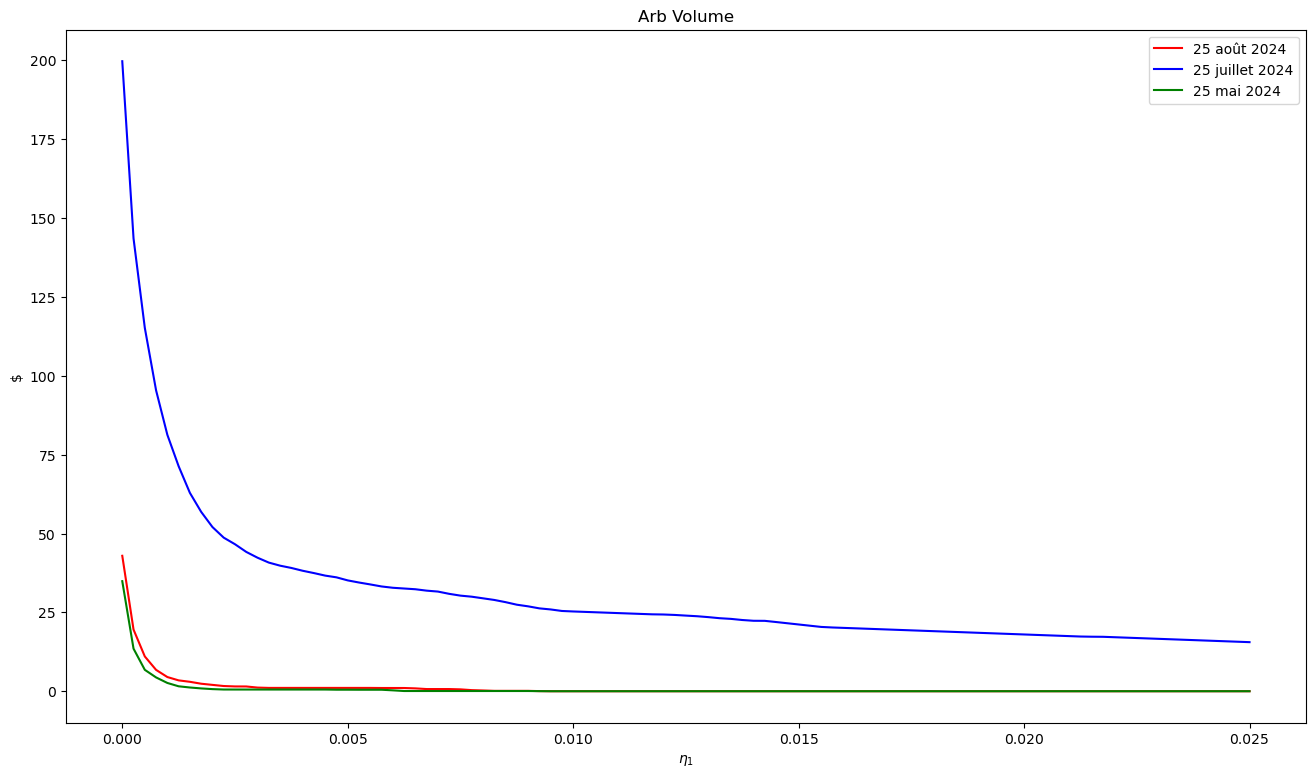

In [62]:
plt.plot(eta1_vals,output_vals1[:,6], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,6], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,6], color='green',label="25 mai 2024")
plt.title("Arb Volume")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('arb_vol_eta_sigma.pdf')

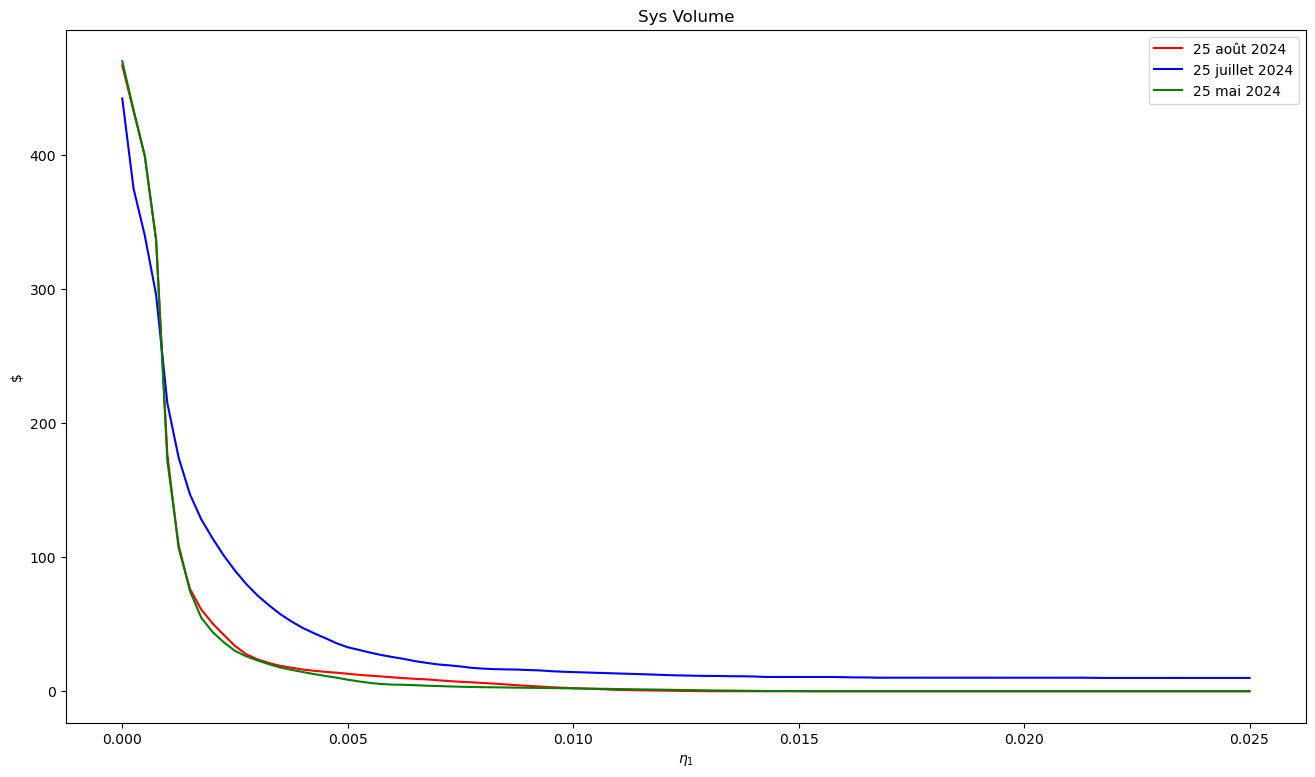

In [63]:
plt.plot(eta1_vals,output_vals1[:,4]-output_vals1[:,5], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,4]-output_vals2[:,5], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,4]-output_vals3[:,5], color='green',label="25 mai 2024")
plt.title("Sys Volume")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('arb_vol_eta_sigma.pdf')

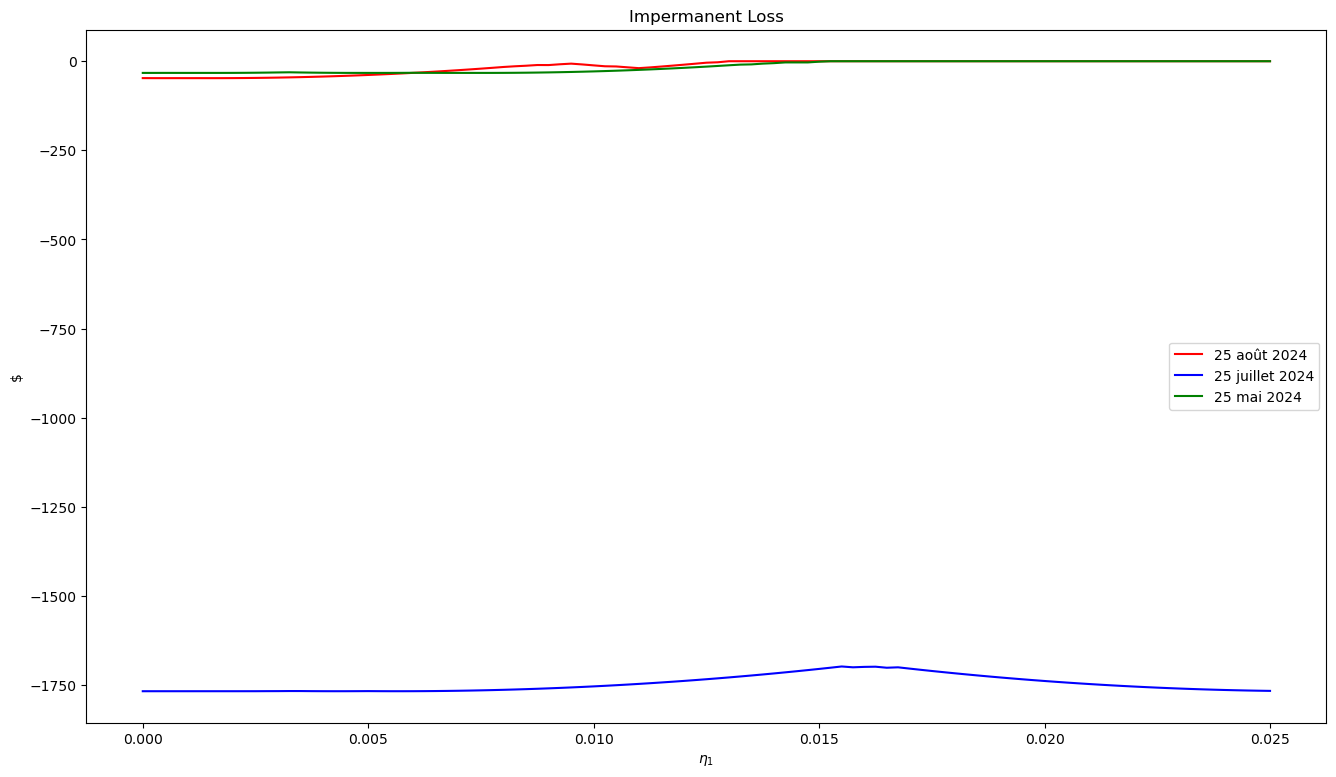

In [64]:
plt.plot(eta1_vals,output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("Impermanent Loss")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('imp_loss_eta_sigma.pdf')

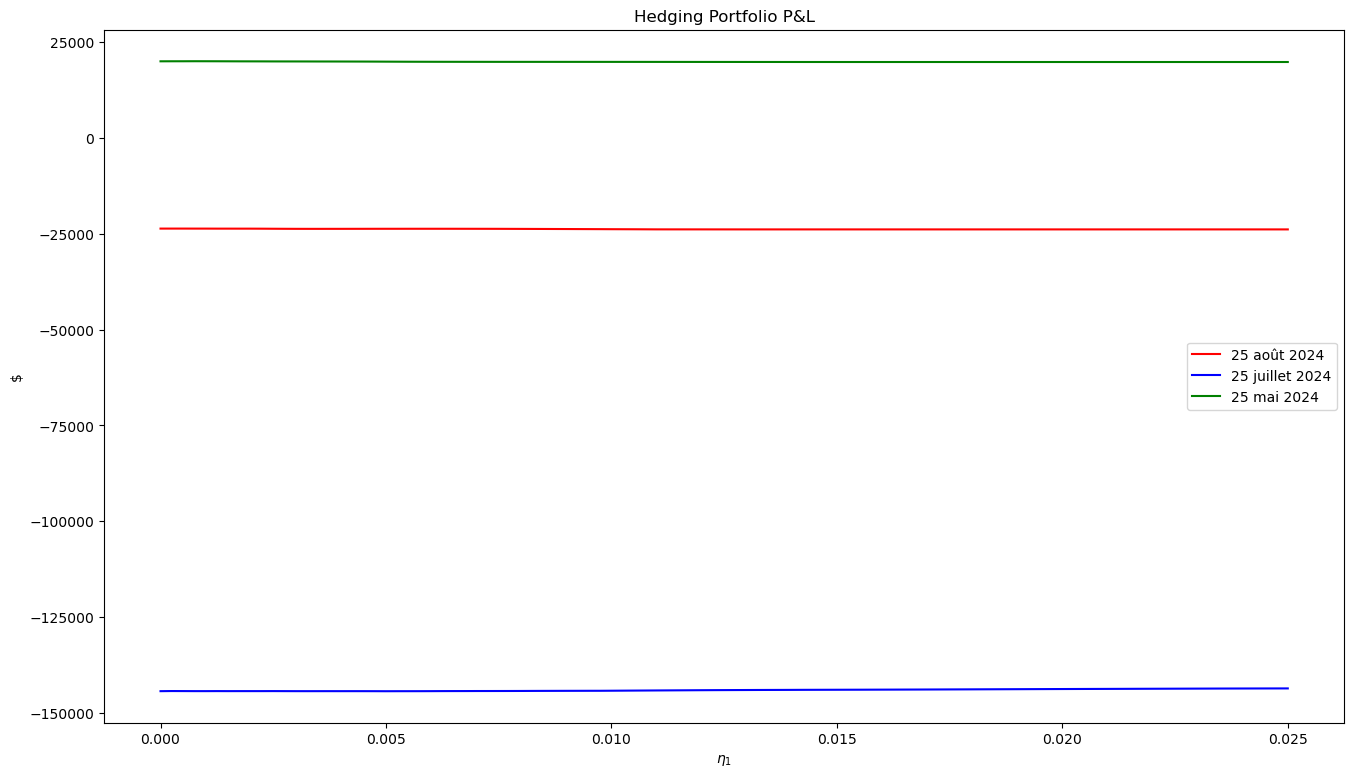

In [65]:
plt.plot(eta1_vals,output_vals1[:,15]-output_vals1[:,13], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,15]-output_vals2[:,13], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,15]-output_vals3[:,13], color='green',label="25 mai 2024")
plt.title("Hedging Portfolio P&L")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('tracking_eta_sigma.pdf')

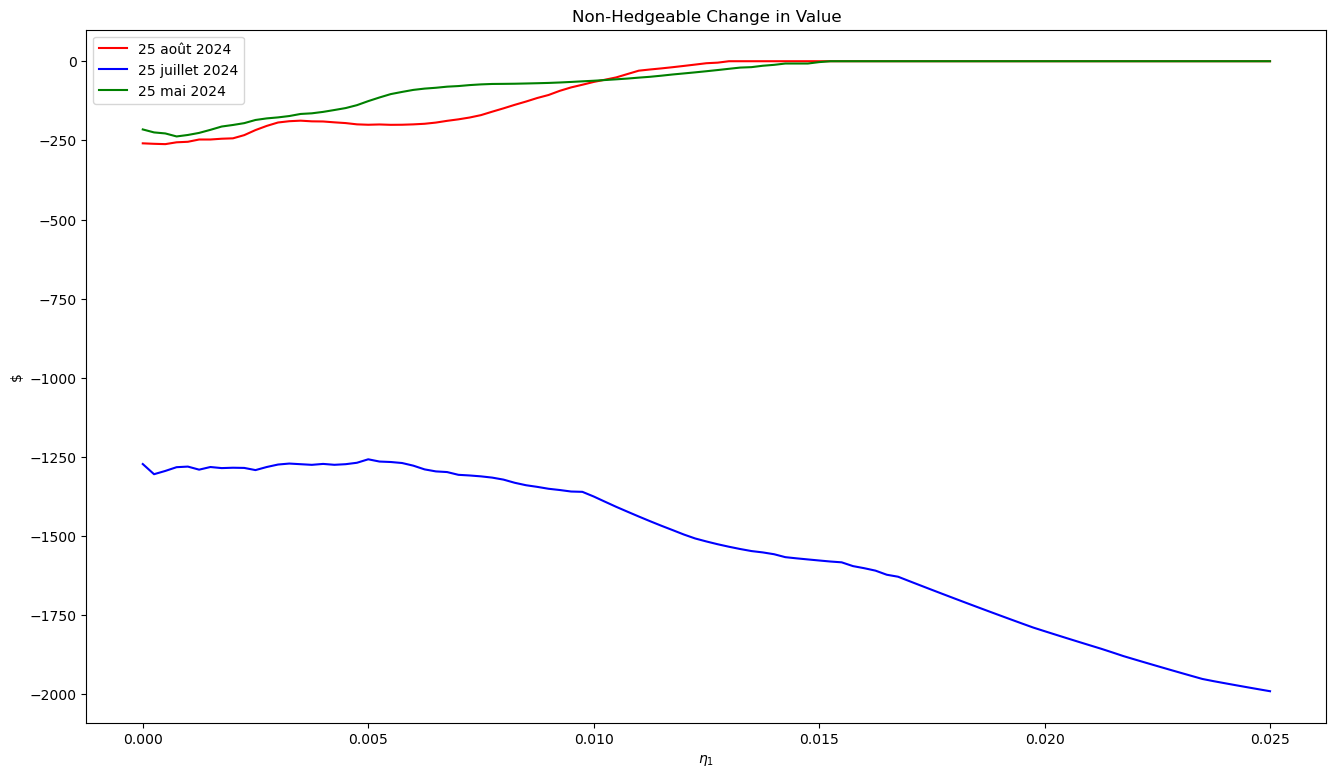

In [66]:
plt.plot(eta1_vals,output_vals1[:,12]-output_vals1[:,13]-(output_vals1[:,15]-output_vals1[:,13]), color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,12]-output_vals2[:,13]-(output_vals2[:,15]-output_vals2[:,13]), color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,12]-output_vals3[:,13]-(output_vals3[:,15]-output_vals3[:,13]), color='green',label="25 mai 2024")
plt.title("Non-Hedgeable Change in Value")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('nonhedge_change_eta_sigma.pdf')

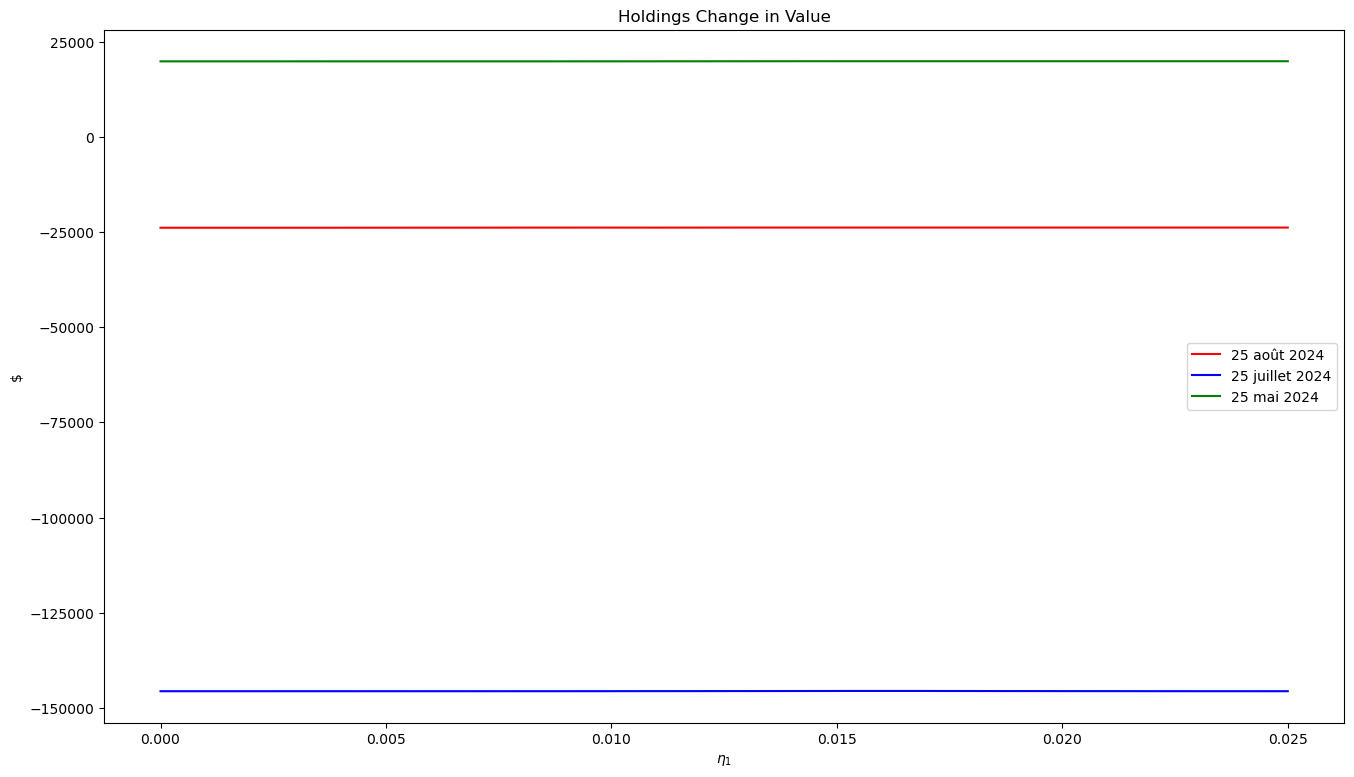

In [67]:
plt.plot(eta1_vals,output_vals1[:,12]-output_vals1[:,13], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,12]-output_vals2[:,13], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,12]-output_vals3[:,13], color='green',label="25 mai 2024")
plt.title("Holdings Change in Value")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('holdings_change_eta_sigma.pdf')

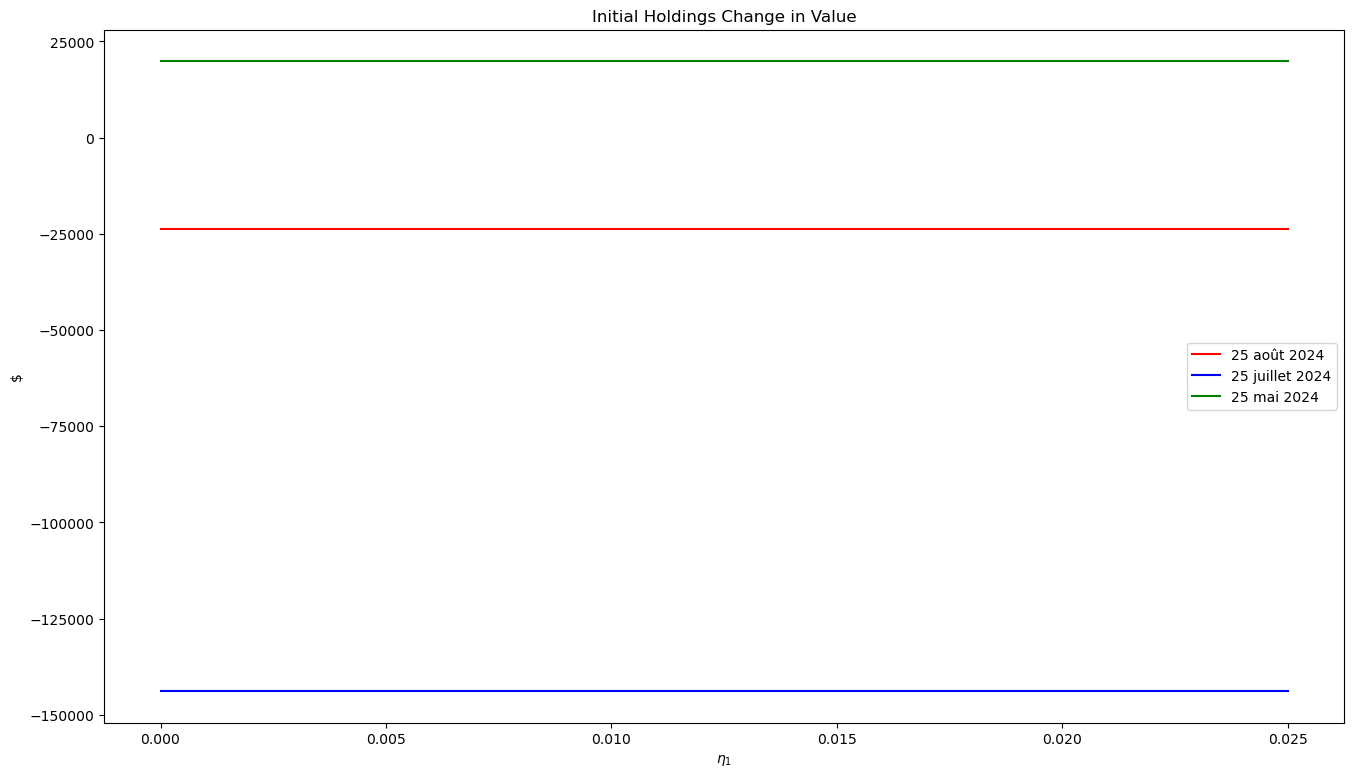

In [68]:
plt.plot(eta1_vals,output_vals1[:,14]-output_vals1[:,13], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,14]-output_vals2[:,13], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,14]-output_vals3[:,13], color='green',label="25 mai 2024")
plt.title("Initial Holdings Change in Value")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('init_change_eta_sigma.pdf')

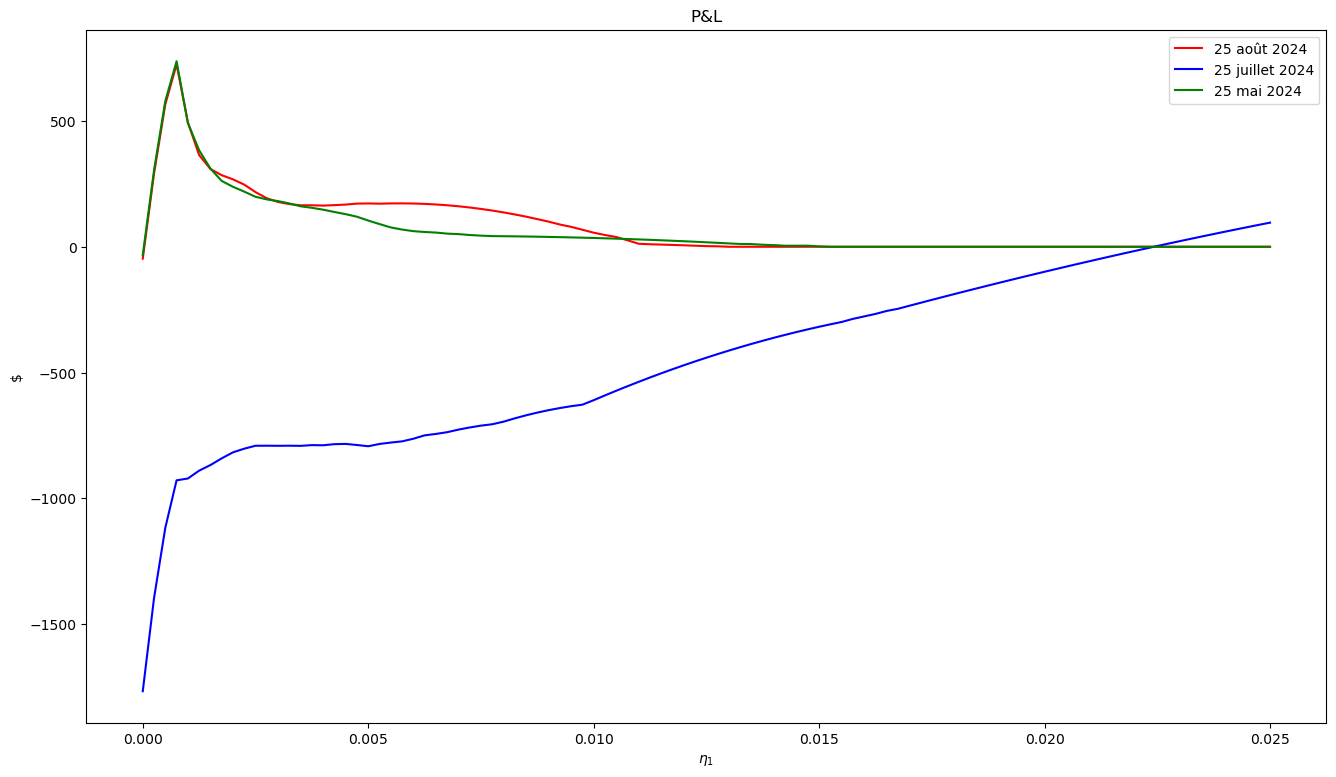

In [69]:
plt.plot(eta1_vals,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("P&L")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('pnl_eta_sigma.pdf')

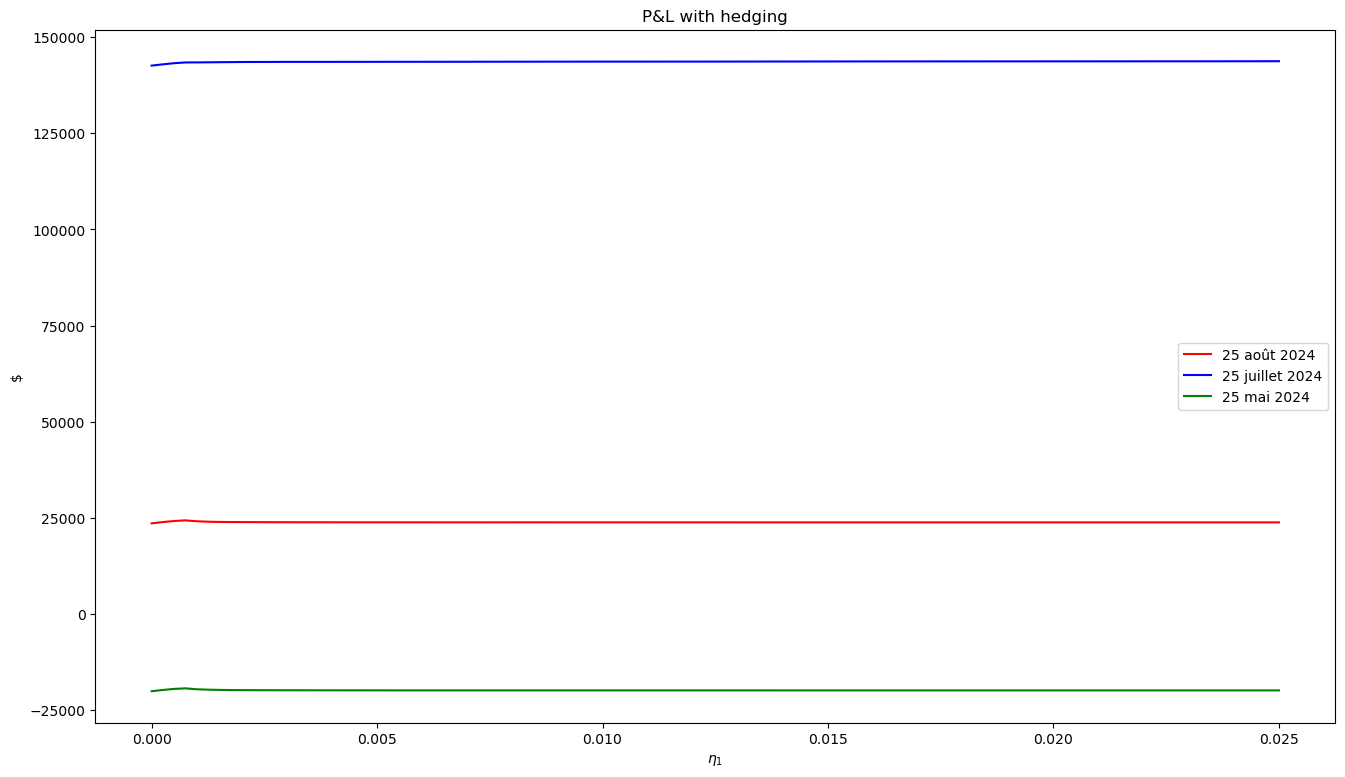

In [70]:
plt.plot(eta1_vals,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3] - (output_vals1[:,15]-output_vals1[:,13]), color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3] - (output_vals2[:,15]-output_vals2[:,13]), color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3] - (output_vals3[:,15]-output_vals3[:,13]), color='green',label="25 mai 2024")
plt.title("P&L with hedging")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.show()

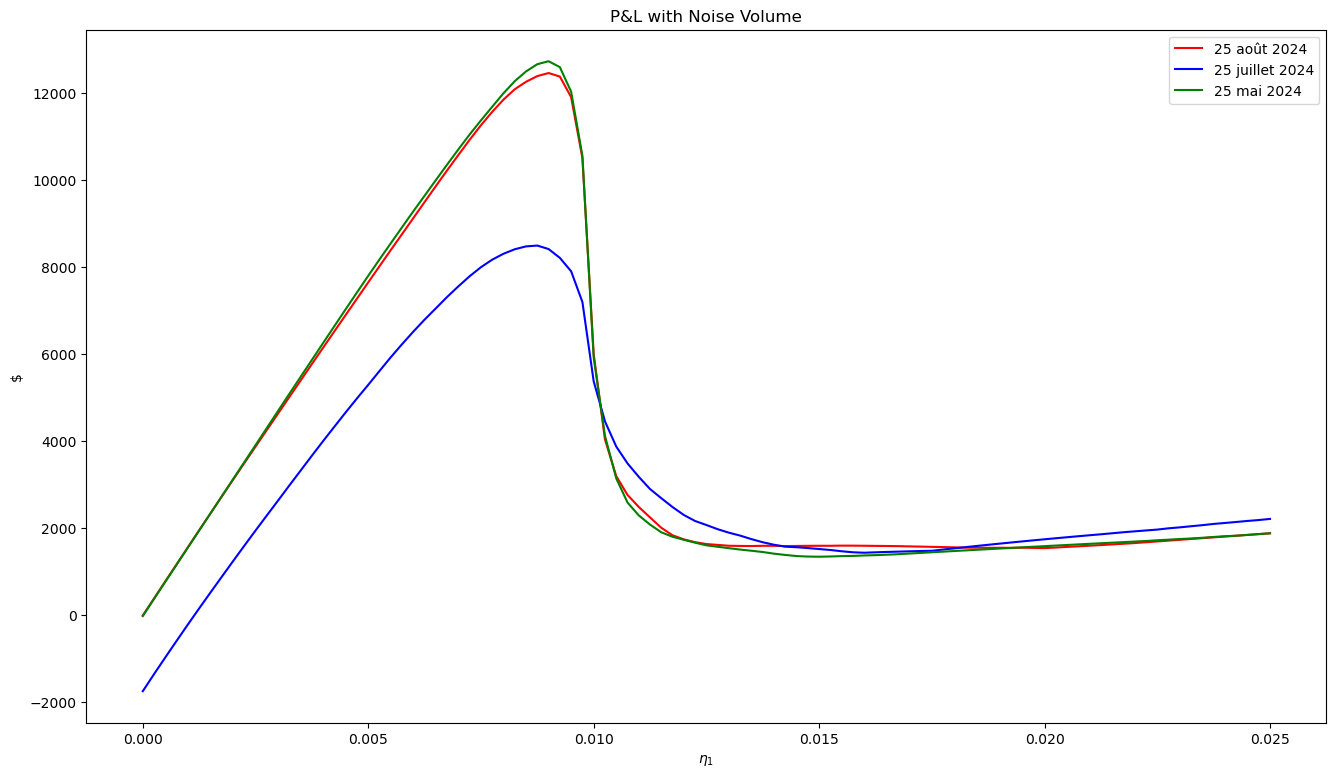

In [37]:
plt.plot(eta1_vals,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3]+output_vals1[:,16], color='red',label="25 août 2024")
plt.plot(eta1_vals,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3]+output_vals2[:,16], color='blue',label="25 juillet 2024")
plt.plot(eta1_vals,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3]+output_vals3[:,16], color='green',label="25 mai 2024")
plt.title("P&L with Noise Volume")
plt.ylabel("\$")
plt.xlabel("$\eta_1$")
plt.legend()
plt.savefig('pnl_eta_sigma_noise.pdf')

In [36]:
%%time
S0 = pa_0[0,0]
S1 = pa_1[0,0]
S2 = pa_2[0,0]

Ks = np.array([250+i*100 for i in range(1,51)])


Xs0 = np.array([np.sqrt(S0)*Ks[i] for i in range(len(Ks))])
Ys0 = np.array([Ks[i]/np.sqrt(S0) for i in range(len(Ks))])
output_vals1 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_0, buy, sell, noise, eta0, eta1, Xs0[j], Ys0[j]) for j in tqdm(range(len(Ys0)))
)

Xs1 = np.array([np.sqrt(S1)*Ks[i] for i in range(len(Ks))])
Ys1 = np.array([Ks[i]/np.sqrt(S1) for i in range(len(Ks))])
output_vals2 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_1, buy, sell, noise, eta0, eta1, Xs1[j], Ys1[j]) for j in tqdm(range(len(Ys1)))
)

Xs2 = np.array([np.sqrt(S2)*Ks[i] for i in range(len(Ks))])
Ys2 = np.array([Ks[i]/np.sqrt(S2) for i in range(len(Ks))])
output_vals3 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_2, buy, sell, noise, eta0, eta1, Xs2[j], Ys2[j]) for j in tqdm(range(len(Ys2)))
)

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 70.73it/s]


CPU times: user 558 ms, sys: 14.6 ms, total: 572 ms
Wall time: 3.18 s


In [37]:
print(Ks)
print(Xs0)
print(Ys0)

[ 350  450  550  650  750  850  950 1050 1150 1250 1350 1450 1550 1650
 1750 1850 1950 2050 2150 2250 2350 2450 2550 2650 2750 2850 2950 3050
 3150 3250 3350 3450 3550 3650 3750 3850 3950 4050 4150 4250 4350 4450
 4550 4650 4750 4850 4950 5050 5150 5250]
[ 18420.07804001  23682.95748001  28945.83692001  34208.71636002
  39471.59580002  44734.47524002  49997.35468002  55260.23412003
  60523.11356003  65785.99300003  71048.87244003  76311.75188003
  81574.63132004  86837.51076004  92100.39020004  97363.26964004
 102626.14908005 107889.02852005 113151.90796005 118414.78740005
 123677.66684006 128940.54628006 134203.42572006 139466.30516006
 144729.18460007 149992.06404007 155254.94348007 160517.82292007
 165780.70236008 171043.58180008 176306.46124008 181569.34068008
 186832.22012009 192095.09956009 197357.97900009 202620.85844009
 207883.73788009 213146.6173201  218409.4967601  223672.3762001
 228935.2556401  234198.13508011 239461.01452011 244723.89396011
 249986.77340011 255249.6528401

In [38]:
output_vals1 = np.array(output_vals1)
output_vals2 = np.array(output_vals2)
output_vals3 = np.array(output_vals3)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\k'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/1430359628.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/1430359628.py:6: SyntaxWarning: invalid escape sequence '\k'
  plt.xlabel("$\kappa$")


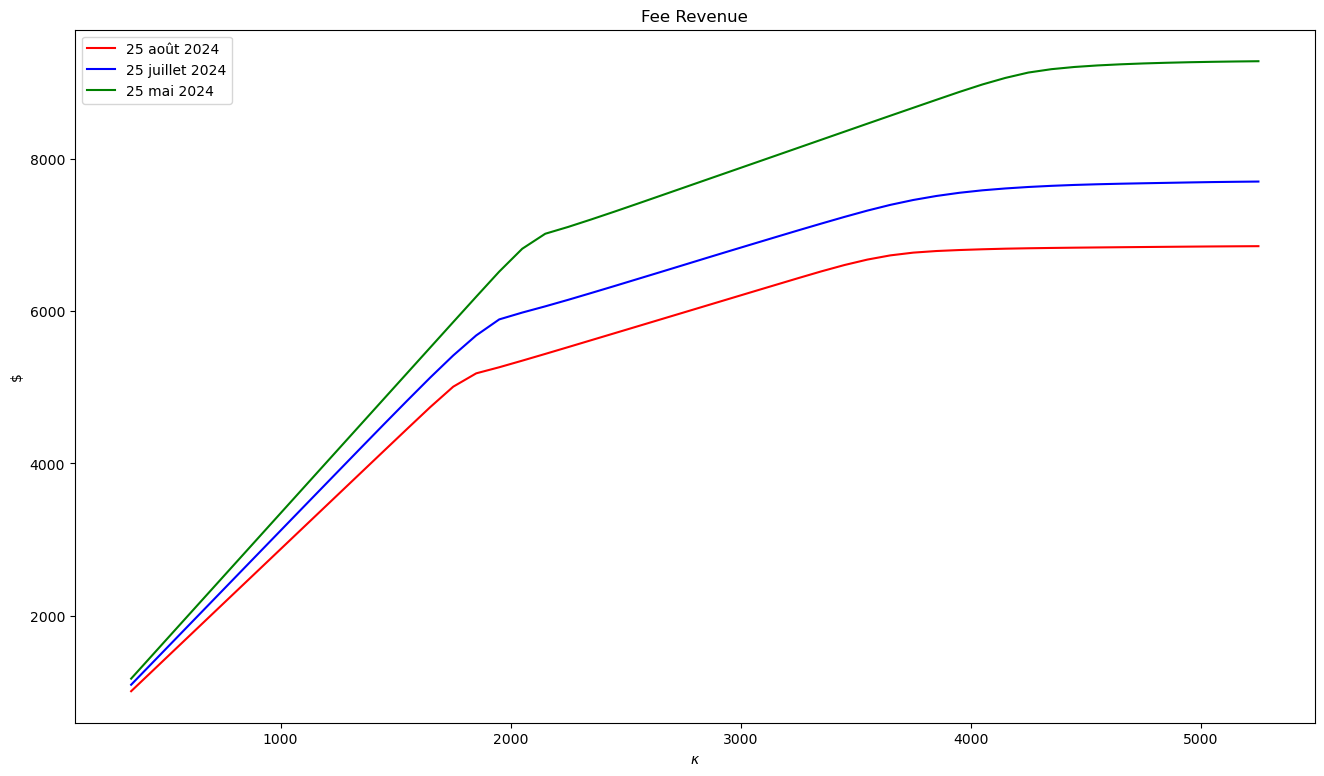

In [39]:
plt.plot(Ks,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2], color='red',label="25 août 2024")
plt.plot(Ks,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2], color='blue',label="25 juillet 2024")
plt.plot(Ks,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2], color='green',label="25 mai 2024")
plt.title("Fee Revenue")
plt.ylabel("\$")
plt.xlabel("$\kappa$")
plt.legend()
plt.savefig('fee_rev_liquidity.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\k'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3542344134.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3542344134.py:6: SyntaxWarning: invalid escape sequence '\k'
  plt.xlabel("$\kappa$")


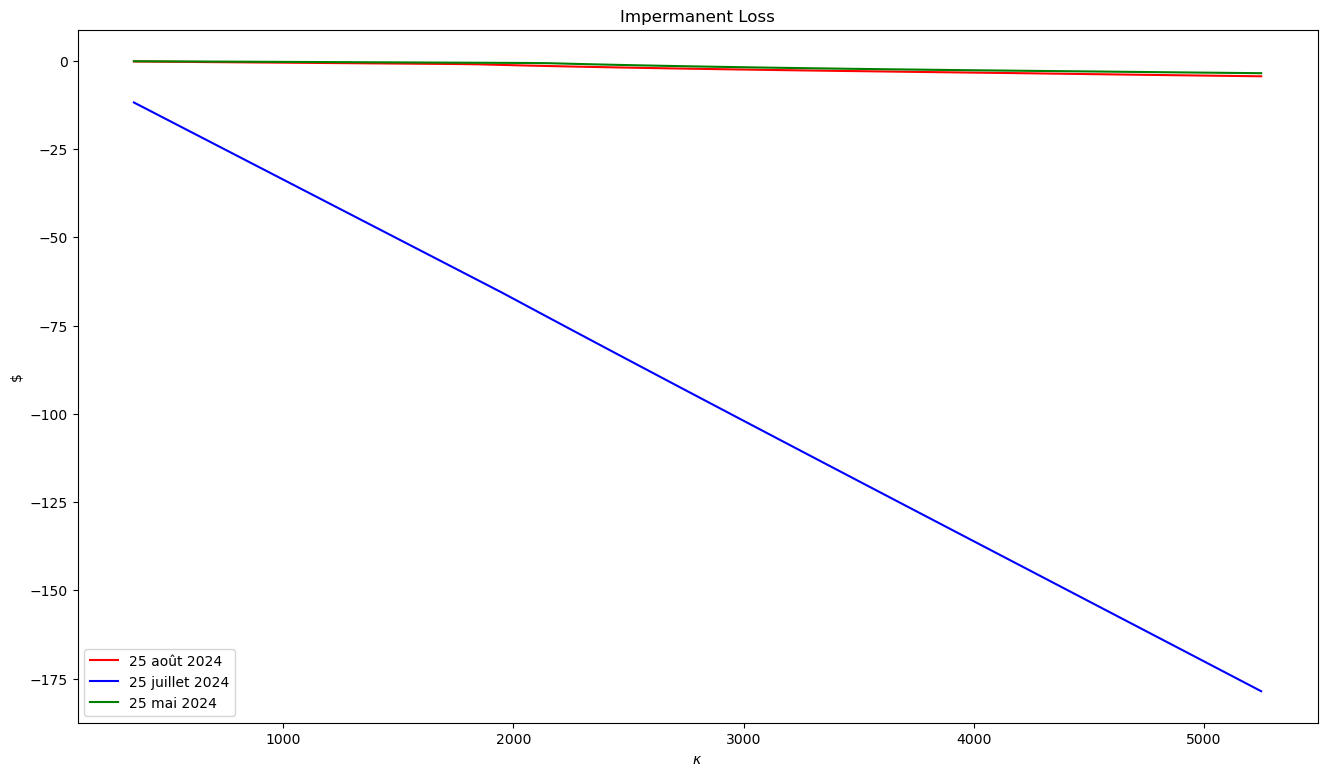

In [40]:
plt.plot(Ks,output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(Ks,output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(Ks,output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("Impermanent Loss")
plt.ylabel("\$")
plt.xlabel("$\kappa$")
plt.legend()
plt.savefig('imp_loss_liquidity.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\k'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\k'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/2585709857.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/2585709857.py:6: SyntaxWarning: invalid escape sequence '\k'
  plt.xlabel("$\kappa$")


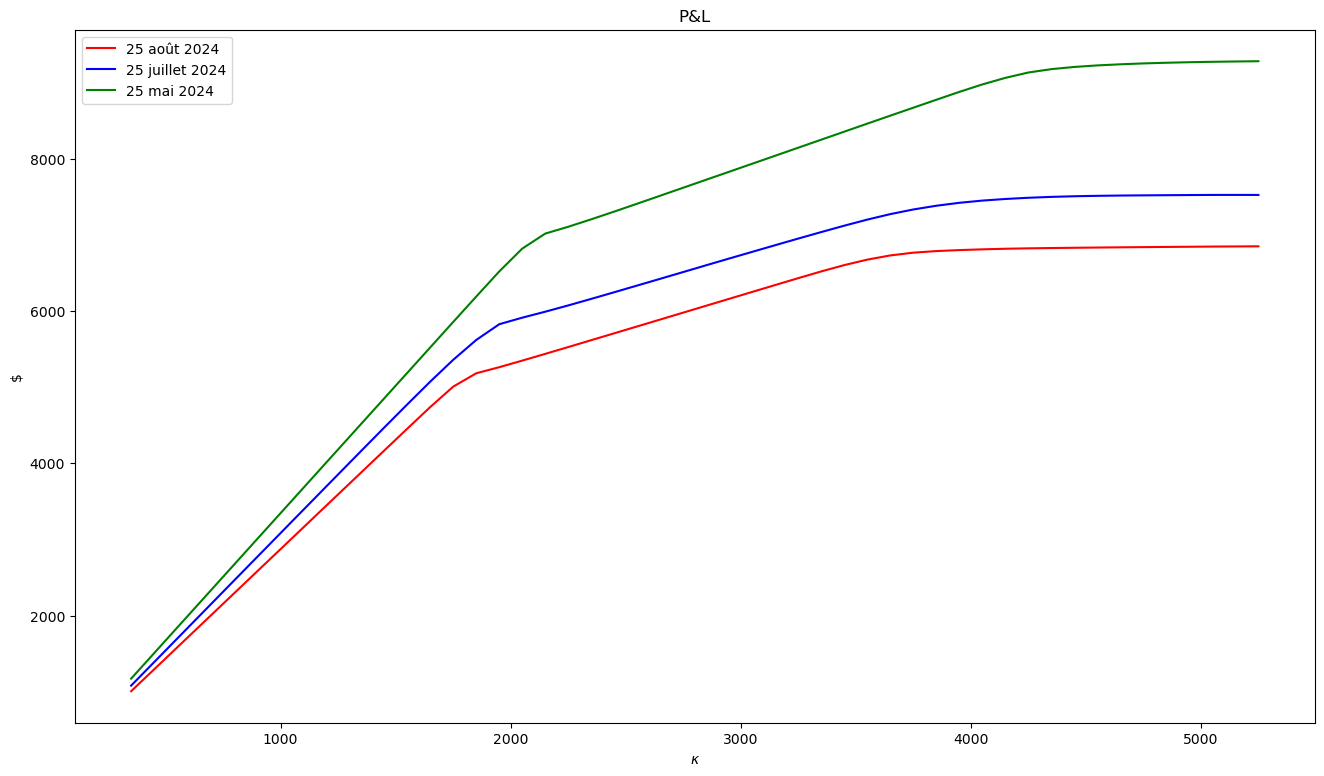

In [41]:
plt.plot(Ks,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(Ks,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(Ks,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("P&L")
plt.ylabel("\$")
plt.xlabel("$\kappa$")
plt.legend()
plt.savefig('pnl_liquidity.pdf')

In [42]:
%%time


buys = np.array([100*i*dt for i in range(0,101)])
sells = np.array([-100*i*dt for i in range(0,101)])

output_vals1 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_0, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)
output_vals2 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_1, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)
output_vals3 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_2, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)


100%|█████████████████████████████████████████| 101/101 [00:01<00:00, 61.86it/s]


CPU times: user 749 ms, sys: 25.9 ms, total: 775 ms
Wall time: 6.1 s


In [43]:
output_vals1 = np.array(output_vals1)
output_vals2 = np.array(output_vals2)
output_vals3 = np.array(output_vals3)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3205229947.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3205229947.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


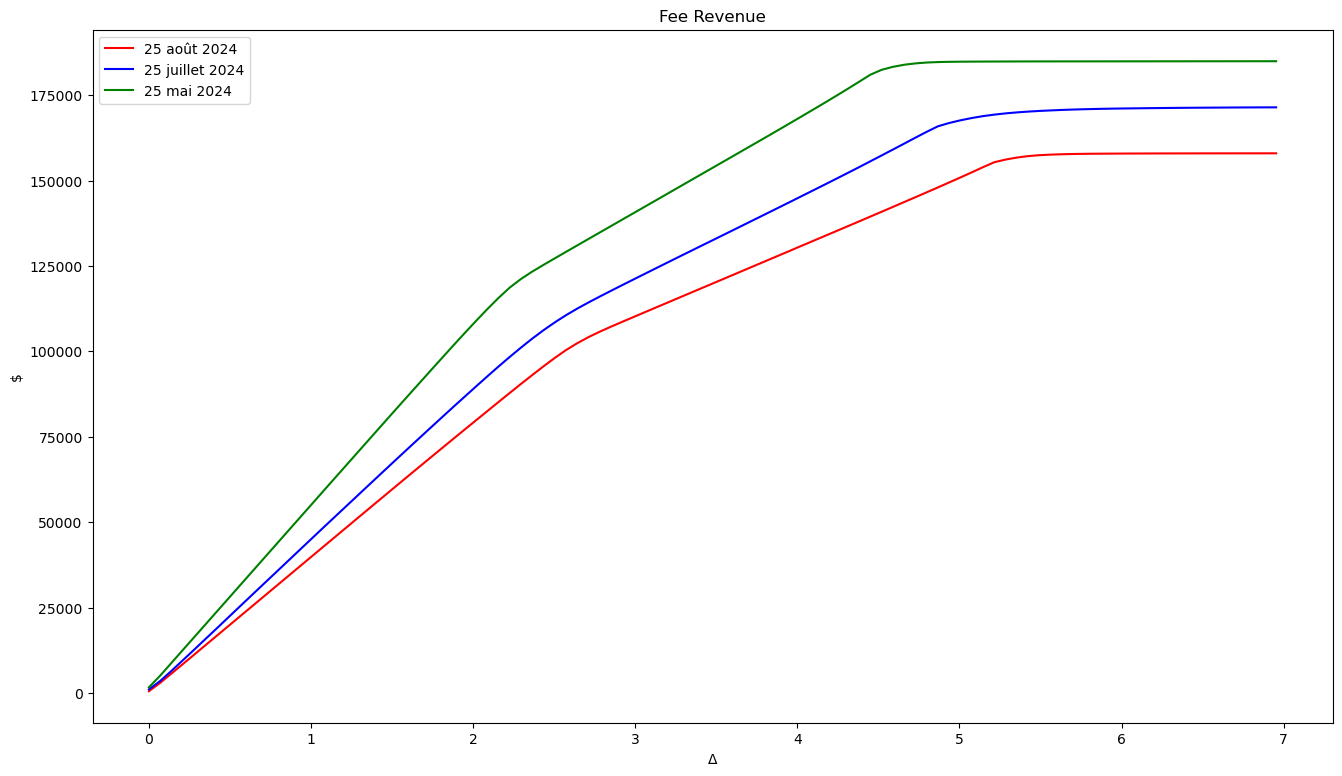

In [44]:
plt.plot(buys,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2], color='green',label="25 mai 2024")
plt.title("Fee Revenue")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('fee_rev_sys_vol.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/263009516.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/263009516.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


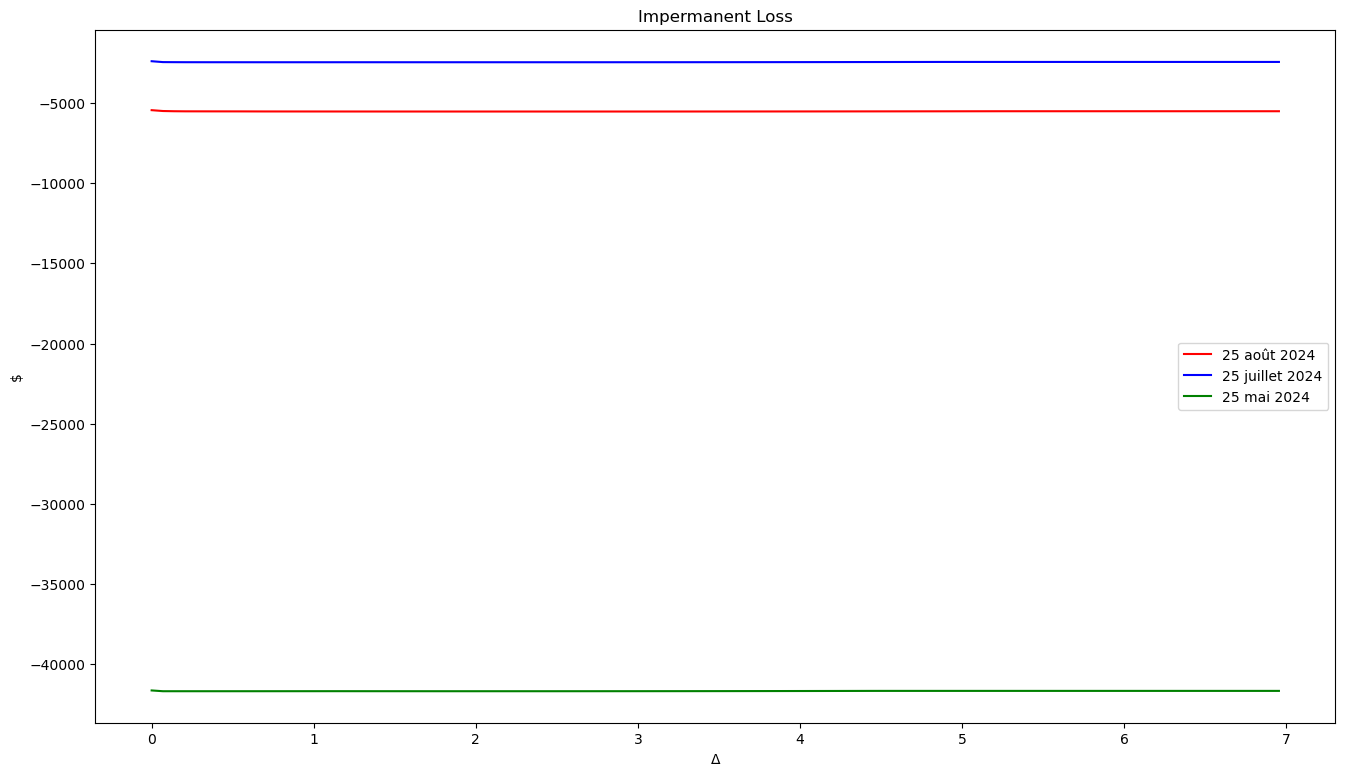

In [45]:
plt.plot(buys,output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("Impermanent Loss")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('imp_loss_sys_vol.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/1299201632.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/1299201632.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


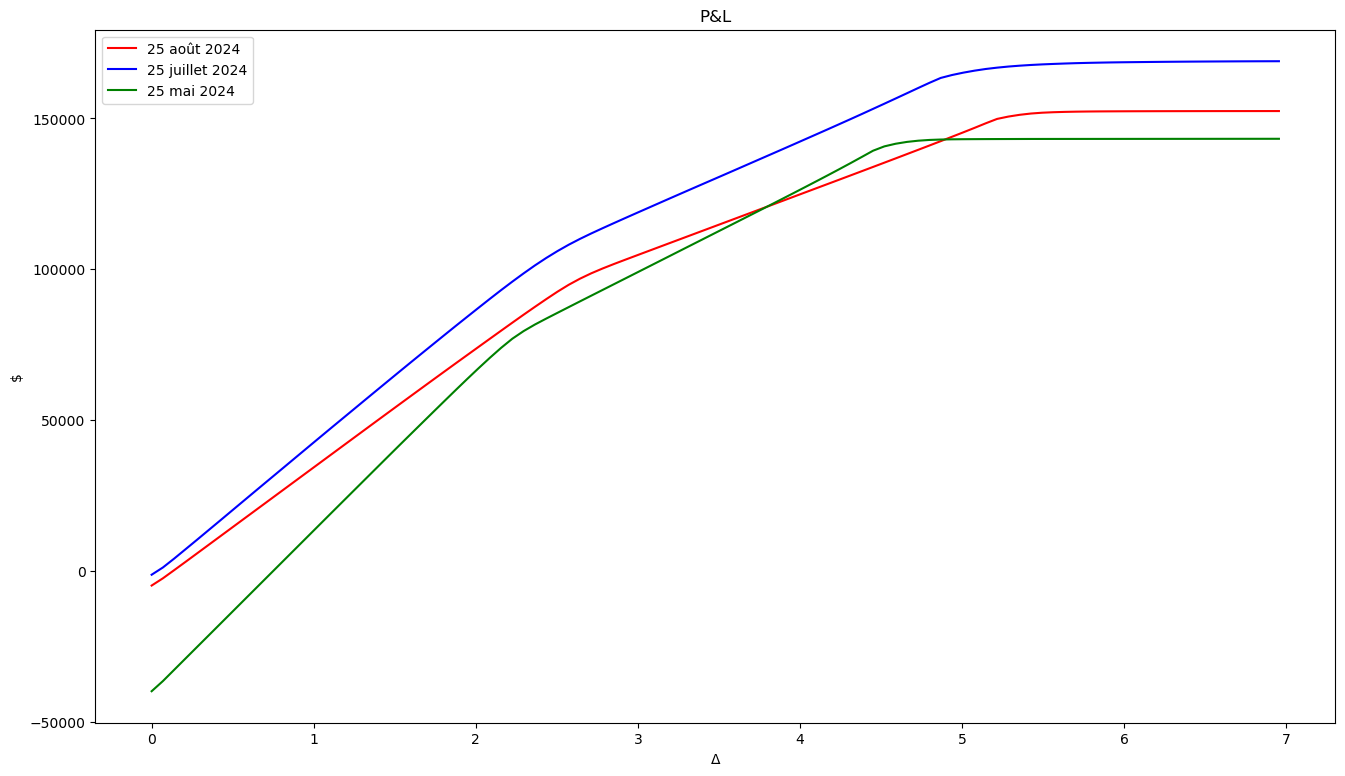

In [46]:
plt.plot(buys,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("P&L")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('pnl_sys_vol.pdf')

In [47]:
%%time


eta1 = 0.01

buys = np.array([100*i*dt for i in range(0,101)])
sells = np.array([-100*i*dt for i in range(0,101)])

output_vals1 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_0, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)
output_vals2 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_1, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)
output_vals3 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_2, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)

100%|█████████████████████████████████████████| 101/101 [00:01<00:00, 62.43it/s]


CPU times: user 713 ms, sys: 26.1 ms, total: 739 ms
Wall time: 6.14 s


In [48]:
output_vals1 = np.array(output_vals1)
output_vals2 = np.array(output_vals2)
output_vals3 = np.array(output_vals3)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3453163032.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3453163032.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


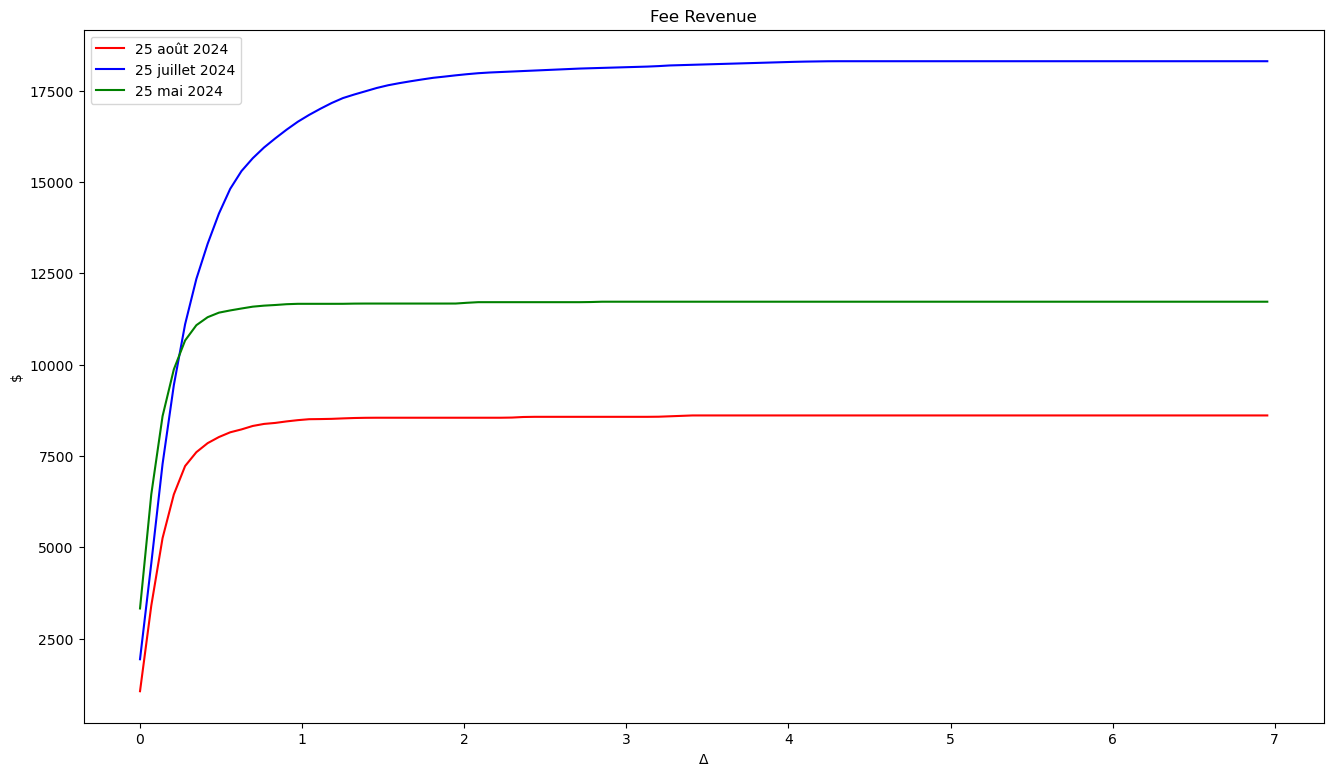

In [49]:
plt.plot(buys,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2], color='green',label="25 mai 2024")
plt.title("Fee Revenue")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('fee_rev_sys_vol_low_cost.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3977996758.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3977996758.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


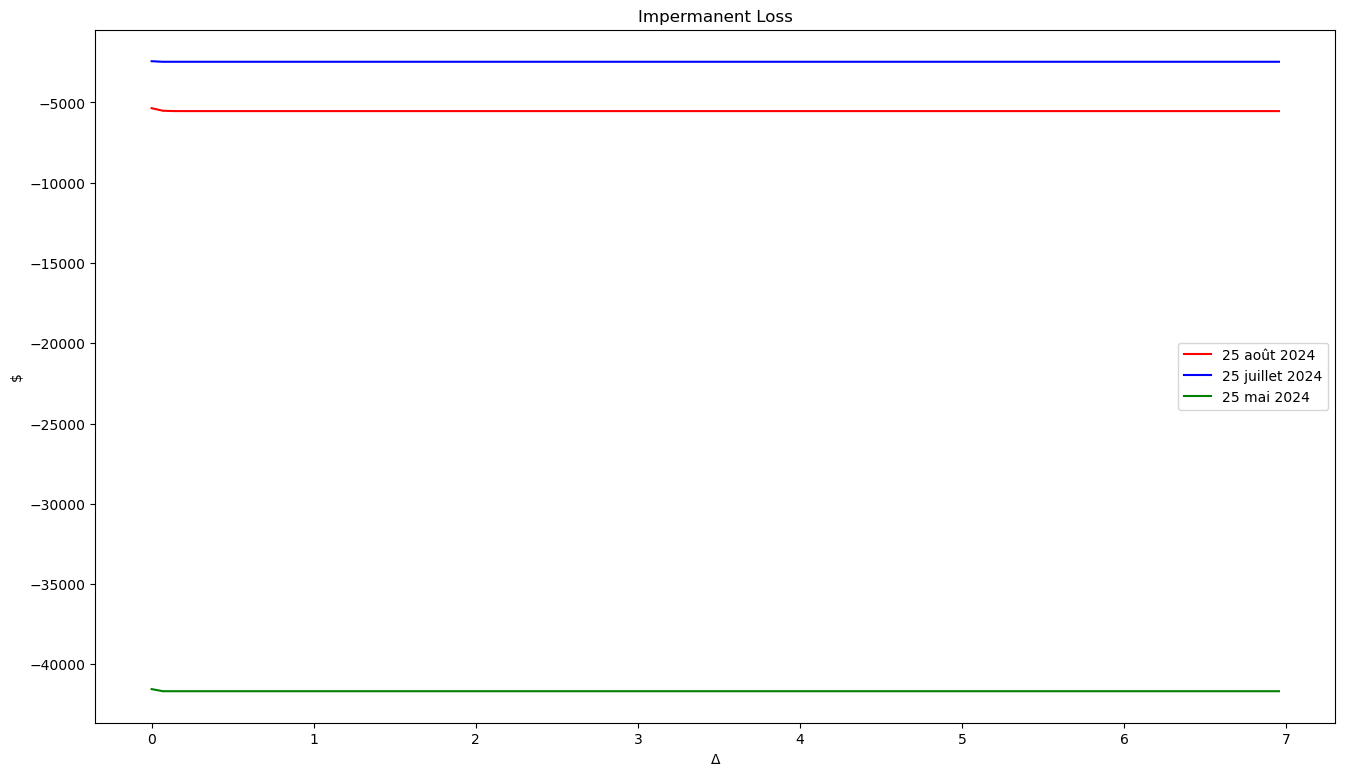

In [50]:
plt.plot(buys,output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("Impermanent Loss")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('imp_loss_sys_vol_low_cost.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/604103458.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/604103458.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


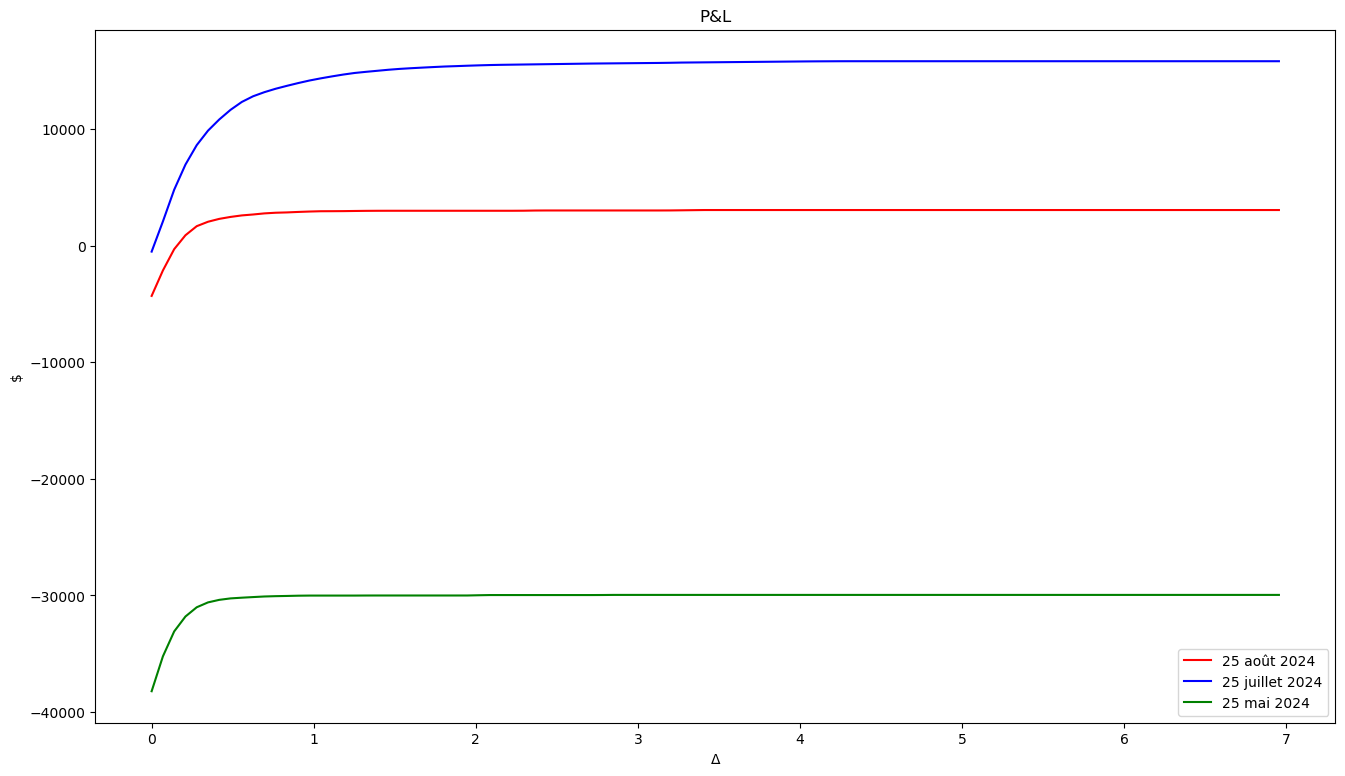

In [51]:
plt.plot(buys,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("P&L")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('pnl_sys_vol_low_cost.pdf')

In [52]:
%%time


eta1 = 0.1

buys = np.array([100*i*dt for i in range(0,101)])
sells = np.array([-100*i*dt for i in range(0,101)])

output_vals1 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_0, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)
output_vals2 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_1, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)
output_vals3 = Parallel(n_jobs=6)(
    delayed(simulation_realprice)(N, T, dt, pa_2, buys[j], sells[j], noise, eta0, eta1, X, Y) for j in tqdm(range(len(buys)))
)

100%|█████████████████████████████████████████| 101/101 [00:01<00:00, 61.71it/s]


CPU times: user 691 ms, sys: 25.1 ms, total: 716 ms
Wall time: 6.3 s


In [53]:
output_vals1 = np.array(output_vals1)
output_vals2 = np.array(output_vals2)
output_vals3 = np.array(output_vals3)

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/826867191.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/826867191.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


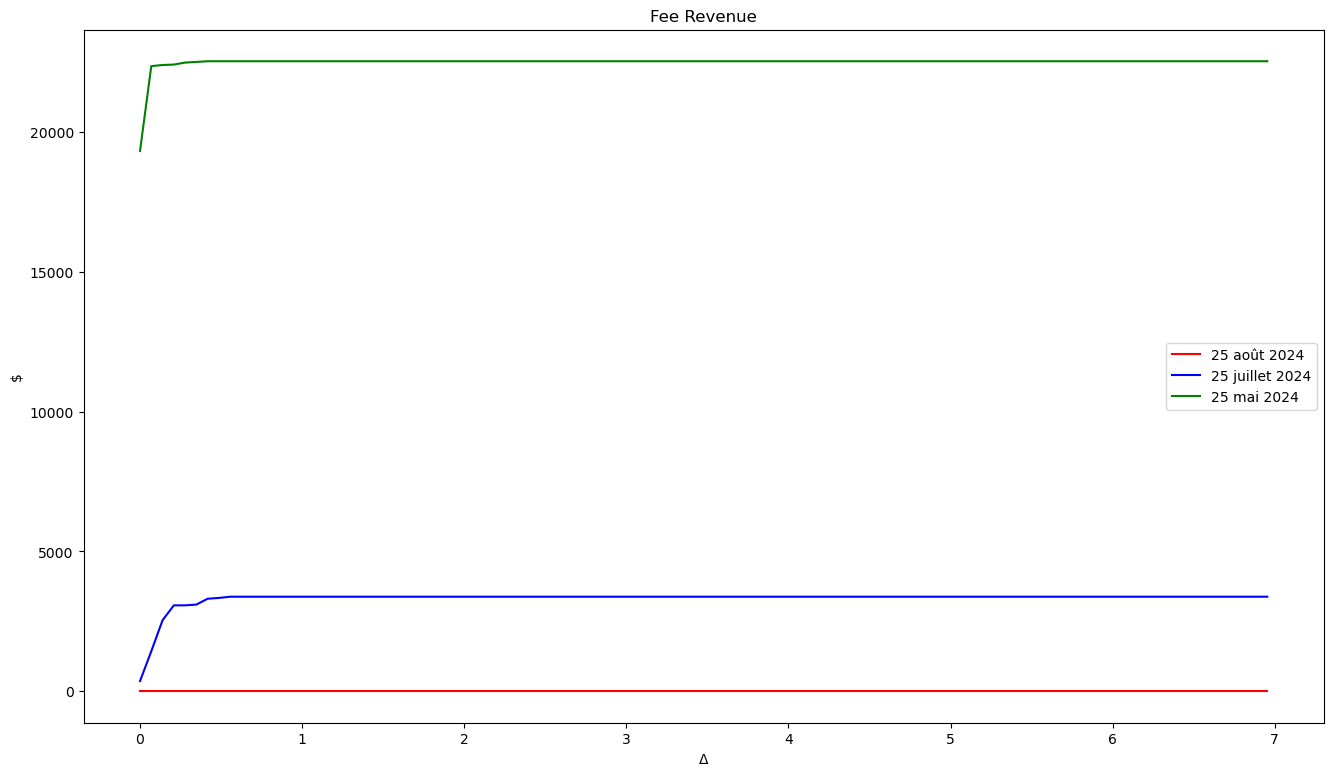

In [54]:
plt.plot(buys,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2], color='green',label="25 mai 2024")
plt.title("Fee Revenue")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('fee_rev_sys_vol_high_cost.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/1564565003.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/1564565003.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


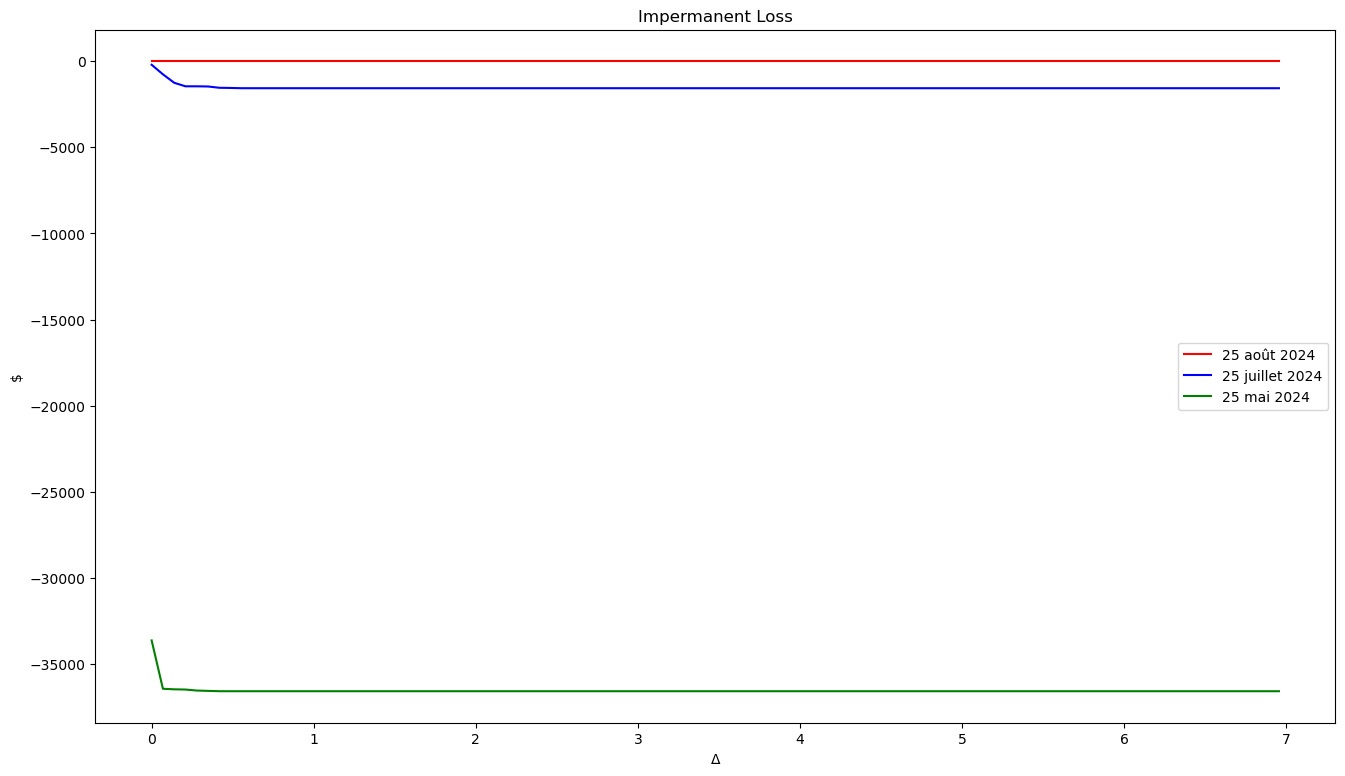

In [55]:
plt.plot(buys,output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("Impermanent Loss")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('imp_loss_sys_vol_high_cost.pdf')

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3432585006.py:5: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("\$")
/var/folders/9s/b67hh_g54h3095f3rlpyk7br0000gq/T/ipykernel_2657/3432585006.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta$")


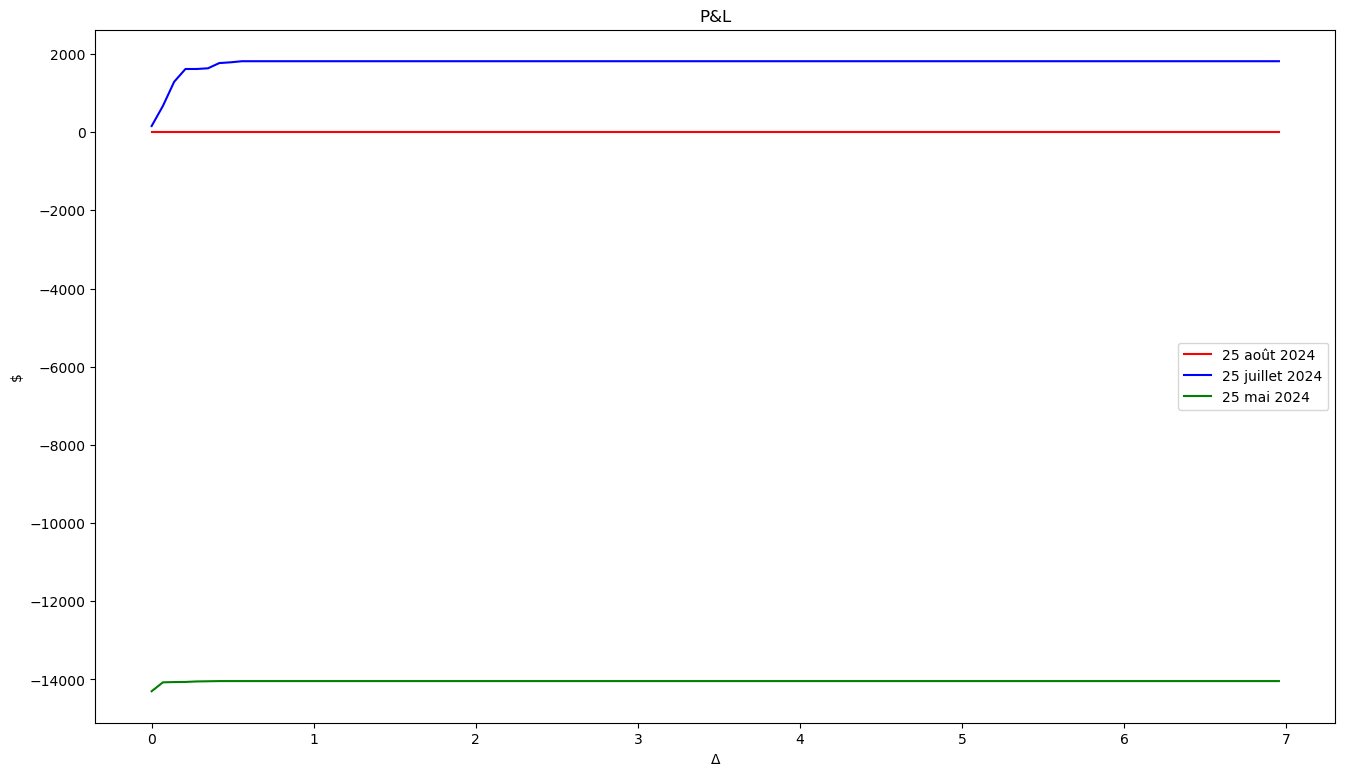

In [56]:
plt.plot(buys,output_vals1[:,0]+output_vals1[:,1]+output_vals1[:,2]+output_vals1[:,3], color='red',label="25 août 2024")
plt.plot(buys,output_vals2[:,0]+output_vals2[:,1]+output_vals2[:,2]+output_vals2[:,3], color='blue',label="25 juillet 2024")
plt.plot(buys,output_vals3[:,0]+output_vals3[:,1]+output_vals3[:,2]+output_vals3[:,3], color='green',label="25 mai 2024")
plt.title("P&L")
plt.ylabel("\$")
plt.xlabel("$\Delta$")
plt.legend()
plt.savefig('pnl_sys_vol_high_cost.pdf')